In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!jt -r

<h1><center>Predition of Vertical Heights </center></h1>

In [337]:
data_1=pd.read_excel("stats_city_lulc.xlsx")
data_2=pd.read_excel("stats_city_osm.xlsx")
data_3=pd.read_excel("stats_city_pois.xlsx")

In [338]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fid              4336 non-null   int64  
 1   hexid09          4336 non-null   object 
 2   IS_DC            4336 non-null   object 
 3   D_Name           4336 non-null   object 
 4   S_Name           4336 non-null   object 
 5   IS_SC            4336 non-null   object 
 6   ndvi_mean        4336 non-null   float64
 7   ndbi_mean        4336 non-null   float64
 8   albedo_mean      4336 non-null   float64
 9   gaia_mean        4336 non-null   float64
 10  ntl_mean         4336 non-null   float64
 11  s1vh_mean        4336 non-null   float64
 12  s1vv_mean        4336 non-null   float64
 13  pop_sum          4336 non-null   float64
 14  lulc_Vegetation  3011 non-null   float64
 15  lulc_Barren      32 non-null     float64
 16  lulc_Builtup     3367 non-null   float64
 17  height_mean   

In [339]:
data_1=data_1[['hexid09','lulc_Vegetation', 'lulc_Barren','lulc_Builtup']]
data_2=data_2[["hexid09","osm_count"]]
data_m=pd.merge(data_3,data_1,on="hexid09")
data=pd.merge(data_m,data_2,on="hexid09")
new_order=['fid', 'hexid09', 'IS_DC', 'D_Name', 'S_Name', 'IS_SC', 'ndvi_mean',
       'ndbi_mean', 'albedo_mean', 'gaia_mean', 'ntl_mean', 's1vh_mean',
       's1vv_mean', 'pop_sum', 'poi_businessfacility', 'poi_restaurant',
       'poi_nightlife', 'poi_shopping', 'poi_hotel', 'poi_cinema',
       'poi_sportscomplex', 'poi_sportscentre', 'poi_hospital', 'poi_school',
       'poi_conveniencestr', 'poi_gurugram_v1_clothingstr',
       'poi_sportinggoodsstr', 'poi_medicalservice', 'poi_residentialbuilding',
       'poi_consumerelectronicsstr', 'lulc_Vegetation',
       'lulc_Barren', 'lulc_Builtup', 'osm_count', 'height_mean']
df = data.reindex(columns=new_order)


In [340]:
df.shape

(4336, 35)

### DATA - (H09 grid)
#### Here is the First five rows of Raw Data

In [341]:
df.head()

fid          hexid09      IS_DC    D_Name   S_Name   IS_SC  ndvi_mean  \
0    3  893da1ce837ffff  IND006086  Gurugram  Haryana  IND006   0.244329   
1    6  893da118e67ffff  IND006086  Gurugram  Haryana  IND006   0.115180   
2   10  893da1cecb7ffff  IND006086  Gurugram  Haryana  IND006   0.308332   
3   13  893da1c5527ffff  IND006086  Gurugram  Haryana  IND006   0.263235   
4   16  893da10a4bbffff  IND006086  Gurugram  Haryana  IND006   0.234399   

   ndbi_mean  albedo_mean  gaia_mean  ntl_mean  s1vh_mean  s1vv_mean  \
0  -0.120760     0.272413   1.822222  7.462338 -16.687158  -9.444416   
1   0.003321     0.267912   4.222222 31.211430 -15.587323  -7.841371   
2  -0.214459     0.267191   0.251852  2.815385 -17.099760  -9.421715   
3  -0.125650     0.278309   0.000000  3.407586 -18.395268 -10.554014   
4  -0.039582     0.273676   0.014706  4.111743 -13.512552  -7.872238   

     pop_sum  poi_businessfacility  poi_restaurant  poi_nightlife  \
0  82.936740                   NaN             NaN            NaN   
1 497.974472                   NaN             NaN            NaN   
2   0.175912                   NaN             NaN            NaN   
3   0.000000                   NaN             NaN            NaN   
4   0.000000                   NaN             NaN            NaN   

   poi_shopping  poi_hotel  poi_cinema  poi_sportscomplex  poi_sportscentre  \
0           NaN        NaN         NaN                NaN               NaN   
1           NaN        NaN         NaN                NaN               NaN   
2           NaN        NaN         NaN                NaN               NaN   
3           NaN        NaN         NaN                NaN               NaN   
4           NaN        NaN         NaN                NaN               NaN   

   poi_hospital  poi_school  poi_conveniencestr  poi_gurugram_v1_clothingstr  \
0           NaN         NaN                 NaN                          NaN   
1           NaN         NaN                 NaN                          NaN   
2           NaN         NaN                 NaN                          NaN   
3           NaN         NaN                 NaN                          NaN   
4           NaN         NaN                 NaN                          NaN   

   poi_sportinggoodsstr  poi_medicalservice  poi_residentialbuilding  \
0                   NaN                 NaN                      NaN   
1                   NaN                 NaN                      NaN   
2                   NaN                 NaN                      NaN   
3                   NaN                 NaN                      NaN   
4                   NaN                 NaN                      NaN   

   poi_consumerelectronicsstr  lulc_Vegetation  lulc_Barren  lulc_Builtup  \
0                         NaN     90500.000000          NaN  13600.000000   
1                         NaN     20300.000000          NaN  83900.000000   
2                         NaN    103800.000000          NaN           NaN   
3                         NaN    103800.000000          NaN           NaN   
4                         NaN    103700.000000          NaN           NaN   

   osm_count  height_mean  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3        NaN          NaN  
4        NaN          NaN

#### Removing two attributes fid and hex_id 

In [342]:
pd.set_option("display.max_column",100)
data=df.iloc[:,6:]
data

ndvi_mean  ndbi_mean  albedo_mean  gaia_mean  ntl_mean  s1vh_mean  \
0      0.244329  -0.120760     0.272413   1.822222  7.462338 -16.687158   
1      0.115180   0.003321     0.267912   4.222222 31.211430 -15.587323   
2      0.308332  -0.214459     0.267191   0.251852  2.815385 -17.099760   
3      0.263235  -0.125650     0.278309   0.000000  3.407586 -18.395268   
4      0.234399  -0.039582     0.273676   0.014706  4.111743 -13.512552   
...         ...        ...          ...        ...       ...        ...   
4331   0.238677  -0.072828     0.277661   2.036496 11.201323 -15.744324   
4332   0.163330  -0.057190     0.256069  12.277372 13.668723 -14.985604   
4333   0.257517  -0.115883     0.276788   0.102190 11.766646 -15.558168   
4334   0.207328  -0.081850     0.259626   4.185185 16.864526 -15.008715   
4335   0.126147  -0.028875     0.250936  18.136691  7.390598 -14.241293   

      s1vv_mean    pop_sum  poi_businessfacility  poi_restaurant  \
0     -9.444416  82.936740                   NaN             NaN   
1     -7.841371 497.974472                   NaN             NaN   
2     -9.421715   0.175912                   NaN             NaN   
3    -10.554014   0.000000                   NaN             NaN   
4     -7.872238   0.000000                   NaN             NaN   
...         ...        ...                   ...             ...   
4331  -9.113115  18.565156                   NaN             NaN   
4332  -8.106168 834.839556                   NaN             NaN   
4333  -8.562651 190.402004                   NaN             NaN   
4334  -7.691119 512.620780                   NaN             NaN   
4335  -7.182307 580.557180                   NaN             NaN   

      poi_nightlife  poi_shopping  poi_hotel  poi_cinema  poi_sportscomplex  \
0               NaN           NaN        NaN         NaN                NaN   
1               NaN           NaN        NaN         NaN                NaN   
2               NaN           NaN        NaN         NaN                NaN   
3               NaN           NaN        NaN         NaN                NaN   
4               NaN           NaN        NaN         NaN                NaN   
...             ...           ...        ...         ...                ...   
4331            NaN           NaN        NaN         NaN                NaN   
4332            NaN           NaN        NaN         NaN                NaN   
4333            NaN           NaN        NaN         NaN                NaN   
4334            NaN           NaN        NaN         NaN                NaN   
4335            NaN           NaN        NaN         NaN                NaN   

      poi_sportscentre  poi_hospital  poi_school  poi_conveniencestr  \
0                  NaN           NaN         NaN                 NaN   
1                  NaN           NaN         NaN                 NaN   
2                  NaN           NaN         NaN                 NaN   
3                  NaN           NaN         NaN                 NaN   
4                  NaN           NaN         NaN                 NaN   
...                ...           ...         ...                 ...   
4331               NaN           NaN         NaN                 NaN   
4332               NaN           NaN         NaN                 NaN   
4333               NaN           NaN         NaN                 NaN   
4334               NaN           NaN    1.000000                 NaN   
4335               NaN           NaN    2.000000                 NaN   

      poi_gurugram_v1_clothingstr  poi_sportinggoodsstr  poi_medicalservice  \
0                             NaN                   NaN                 NaN   
1                             NaN                   NaN                 NaN   
2                             NaN                   NaN                 NaN   
3                             NaN                   NaN                 NaN   
4                             NaN                   NaN                 NaN   


### About Data

In [343]:
data.describe().T

count         mean          std        min  \
ndvi_mean                   4336.000000     0.168676     0.074235  -0.019483   
ndbi_mean                   4336.000000    -0.058268     0.041467  -0.227126   
albedo_mean                 4336.000000     0.259365     0.017513   0.187602   
gaia_mean                   4336.000000     8.489349     8.705879   0.000000   
ntl_mean                    4336.000000    16.959586    12.502746   1.815714   
s1vh_mean                   4336.000000   -14.605244     2.272817 -24.632782   
s1vv_mean                   4336.000000    -7.827833     2.371555 -21.867440   
pop_sum                     4336.000000   421.333290   397.946912   0.000000   
poi_businessfacility        1022.000000    13.373777    28.252867   1.000000   
poi_restaurant               726.000000     5.276860     7.929287   1.000000   
poi_nightlife                 62.000000     1.645161     1.784237   1.000000   
poi_shopping                 224.000000     2.205357     4.095581   1.000000   
poi_hotel                    267.000000     2.295880     2.689177   1.000000   
poi_cinema                    27.000000     1.296296     0.541708   1.000000   
poi_sportscomplex             15.000000     1.066667     0.258199   1.000000   
poi_sportscentre             293.000000     1.665529     1.154535   1.000000   
poi_hospital                 160.000000     3.000000     1.825742   1.000000   
poi_school                   674.000000     2.229970     1.948579   1.000000   
poi_conveniencestr           418.000000     2.363636     2.329421   1.000000   
poi_gurugram_v1_clothingstr  523.000000    11.795411    34.700997   1.000000   
poi_sportinggoodsstr          92.000000     1.728261     1.430463   1.000000   
poi_medicalservice           687.000000     5.184862     7.078642   1.000000   
poi_residentialbuilding      865.000000     2.727168     3.135743   1.000000   
poi_consumerelectronicsstr   619.000000     9.180937    23.351186   1.000000   
lulc_Vegetation             3011.000000 68468.681501 37460.652742 100.000000   
lulc_Barren                   32.000000  9325.000000 14703.543571 100.000000   
lulc_Builtup                3367.000000 71197.416097 37988.123388 100.000000   
osm_count                   2231.000000    51.485881    71.363729   1.000000   
height_mean                  197.000000     4.463041     6.025553   3.000000   

                                     25%          50%           75%  \
ndvi_mean                       0.111702     0.170636      0.228657   
ndbi_mean                      -0.073885    -0.048769     -0.031419   
albedo_mean                     0.248148     0.261747      0.273237   
gaia_mean                       0.983613     5.050915     14.662474   
ntl_mean                        5.763881    13.801790     26.550849   
s1vh_mean                     -16.146999   -14.589585    -12.969922   
s1vv_mean                      -9.226793    -7.845746     -6.326546   
pop_sum                        55.803156   323.527171    703.022784   
poi_businessfacility            1.000000     4.000000     13.000000   
poi_restaurant                  1.000000     2.000000      6.000000   
poi_nightlife                   1.000000     1.000000      1.000000   
poi_shopping                    1.000000     1.000000      2.000000   
poi_hotel                       1.000000     1.000000      3.000000   
poi_cinema                      1.000000     1.000000      1.500000   
poi_sportscomplex               1.000000     1.000000      1.000000   
poi_sportscentre                1.000000     1.000000      2.000000   
poi_hospital                    2.000000     2.000000      4.000000   
poi_school                      1.000000     1.000000      3.000000   
poi_conveniencestr              1.000000     2.000000      3.000000   
poi_gurugram_v1_clothingstr     1.000000     3.000000     10.000000   
poi_sportinggoodsstr            1.000000     1.000000      2.000000   
poi_medicalservice              1.000000     3.000000      6.000000   


#### Data have null

In [344]:
data.isnull().sum()

ndvi_mean                         0
ndbi_mean                         0
albedo_mean                       0
gaia_mean                         0
ntl_mean                          0
s1vh_mean                         0
s1vv_mean                         0
pop_sum                           0
poi_businessfacility           3314
poi_restaurant                 3610
poi_nightlife                  4274
poi_shopping                   4112
poi_hotel                      4069
poi_cinema                     4309
poi_sportscomplex              4321
poi_sportscentre               4043
poi_hospital                   4176
poi_school                     3662
poi_conveniencestr             3918
poi_gurugram_v1_clothingstr    3813
poi_sportinggoodsstr           4244
poi_medicalservice             3649
poi_residentialbuilding        3471
poi_consumerelectronicsstr     3717
lulc_Vegetation                1325
lulc_Barren                    4304
lulc_Builtup                    969
osm_count                   

### Data info
#### Here we find that we have total 11109 data points but in target variable we have only 197 data points in
#### we go with only that 197 rows

In [345]:
df_test=data[data["height_mean"].isnull()==False]

EDA

#### Data Select for the EDA AND MODEL BUILDING

In [346]:
print("Shape of_working data:- ", df_test.shape,"\n")
print("No of null values","\n", df_test.isnull().sum())


Shape of_working data:-  (197, 29) 

No of null values 
 ndvi_mean                        0
ndbi_mean                        0
albedo_mean                      0
gaia_mean                        0
ntl_mean                         0
s1vh_mean                        0
s1vv_mean                        0
pop_sum                          0
poi_businessfacility            54
poi_restaurant                  76
poi_nightlife                  179
poi_shopping                   159
poi_hotel                      147
poi_cinema                     192
poi_sportscomplex              193
poi_sportscentre               157
poi_hospital                   184
poi_school                     129
poi_conveniencestr             154
poi_gurugram_v1_clothingstr    131
poi_sportinggoodsstr           185
poi_medicalservice             102
poi_residentialbuilding         93
poi_consumerelectronicsstr     116
lulc_Vegetation                168
lulc_Barren                    189
lulc_Builtup                     

In [347]:
col=['poi_businessfacility', 'poi_restaurant','poi_nightlife', 'poi_shopping', 'poi_hotel', 'poi_cinema',
       'poi_sportscomplex', 'poi_sportscentre', 'poi_hospital', 'poi_school',
       'poi_conveniencestr', 'poi_gurugram_v1_clothingstr',
       'poi_sportinggoodsstr', 'poi_medicalservice', 'poi_residentialbuilding',
       'poi_consumerelectronicsstr', 'lulc_Vegetation', 'lulc_Barren',"osm_count"]
for i in col:
    df_test[i].fillna(0,inplace=True)
    
    
    

C:\Users\chemi\AppData\Local\Temp\ipykernel_7196\3279723678.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[i].fillna(0,inplace=True)


In [348]:
print("Shape of_working data:- ", df_test.shape,"\n")
print("No of null values","\n", df_test.isnull().sum())

Shape of_working data:-  (197, 29) 

No of null values 
 ndvi_mean                      0
ndbi_mean                      0
albedo_mean                    0
gaia_mean                      0
ntl_mean                       0
s1vh_mean                      0
s1vv_mean                      0
pop_sum                        0
poi_businessfacility           0
poi_restaurant                 0
poi_nightlife                  0
poi_shopping                   0
poi_hotel                      0
poi_cinema                     0
poi_sportscomplex              0
poi_sportscentre               0
poi_hospital                   0
poi_school                     0
poi_conveniencestr             0
poi_gurugram_v1_clothingstr    0
poi_sportinggoodsstr           0
poi_medicalservice             0
poi_residentialbuilding        0
poi_consumerelectronicsstr     0
lulc_Vegetation                0
lulc_Barren                    0
lulc_Builtup                   0
osm_count                      0
height_mean        

In [349]:
df_test.isnull().sum()

ndvi_mean                      0
ndbi_mean                      0
albedo_mean                    0
gaia_mean                      0
ntl_mean                       0
s1vh_mean                      0
s1vv_mean                      0
pop_sum                        0
poi_businessfacility           0
poi_restaurant                 0
poi_nightlife                  0
poi_shopping                   0
poi_hotel                      0
poi_cinema                     0
poi_sportscomplex              0
poi_sportscentre               0
poi_hospital                   0
poi_school                     0
poi_conveniencestr             0
poi_gurugram_v1_clothingstr    0
poi_sportinggoodsstr           0
poi_medicalservice             0
poi_residentialbuilding        0
poi_consumerelectronicsstr     0
lulc_Vegetation                0
lulc_Barren                    0
lulc_Builtup                   0
osm_count                      0
height_mean                    0
dtype: int64

#### DATA DESCRIPTION

In [350]:
df_test.describe().T

count          mean          std  \
ndvi_mean                   197.000000      0.109824     0.046776   
ndbi_mean                   197.000000     -0.053247     0.016491   
albedo_mean                 197.000000      0.244568     0.009938   
gaia_mean                   197.000000     20.138278     6.000665   
ntl_mean                    197.000000     32.399564     9.668186   
s1vh_mean                   197.000000    -12.086241     1.242741   
s1vv_mean                   197.000000     -5.264807     1.494106   
pop_sum                     197.000000    792.403649   292.624730   
poi_businessfacility        197.000000     13.304569    25.609282   
poi_restaurant              197.000000      3.507614     7.212956   
poi_nightlife               197.000000      0.152284     0.787114   
poi_shopping                197.000000      0.350254     0.997017   
poi_hotel                   197.000000      0.675127     1.800238   
poi_cinema                  197.000000      0.045685     0.307963   
poi_sportscomplex           197.000000      0.020305     0.141399   
poi_sportscentre            197.000000      0.309645     0.776280   
poi_hospital                197.000000      0.172589     0.721860   
poi_school                  197.000000      0.710660     1.385986   
poi_conveniencestr          197.000000      0.416244     1.194947   
poi_gurugram_v1_clothingstr 197.000000      3.517766    16.427514   
poi_sportinggoodsstr        197.000000      0.065990     0.268614   
poi_medicalservice          197.000000      1.776650     3.003546   
poi_residentialbuilding     197.000000      1.710660     2.774251   
poi_consumerelectronicsstr  197.000000      2.304569     4.731422   
lulc_Vegetation             197.000000   3342.131980 12504.803221   
lulc_Barren                 197.000000    286.294416  1649.138605   
lulc_Builtup                197.000000 100298.984772 12558.251982   
osm_count                   197.000000     74.751269    80.446357   
height_mean                 197.000000      4.463041     6.025553   

                                     min           25%           50%  \
ndvi_mean                       0.011684      0.073301      0.108481   
ndbi_mean                      -0.106735     -0.064328     -0.053621   
albedo_mean                     0.215910      0.237501      0.243337   
gaia_mean                       2.202899     17.000000     20.904412   
ntl_mean                       18.628571     24.577143     32.041860   
s1vh_mean                     -16.060518    -12.825080    -12.259201   
s1vv_mean                      -8.812301     -6.111005     -5.526170   
pop_sum                        87.877848    600.498628    790.900632   
poi_businessfacility            0.000000      0.000000      3.000000   
poi_restaurant                  0.000000      0.000000      1.000000   
poi_nightlife                   0.000000      0.000000      0.000000   
poi_shopping                    0.000000      0.000000      0.000000   
poi_hotel                       0.000000      0.000000      0.000000   
poi_cinema                      0.000000      0.000000      0.000000   
poi_sportscomplex               0.000000      0.000000      0.000000   
poi_sportscentre                0.000000      0.000000      0.000000   
poi_hospital                    0.000000      0.000000      0.000000   
poi_school                      0.000000      0.000000      0.000000   
poi_conveniencestr              0.000000      0.000000      0.000000   
poi_gurugram_v1_clothingstr     0.000000      0.000000      0.000000   
poi_sportinggoodsstr            0.000000      0.000000      0.000000   
poi_medicalservice              0.000000      0.000000      0.000000   
poi_residentialbuilding         0.000000      0.000000      1.000000   
poi_consumerelectronicsstr      0.000000      0.000000      0.000000   
lulc_Vegetation                 0.000000      0.000000      0.000000   
lulc_Barren                     0.000000      0.000000      0.000000   
lulc_Builtup      

#### Here we see the which columns are normaly distributed

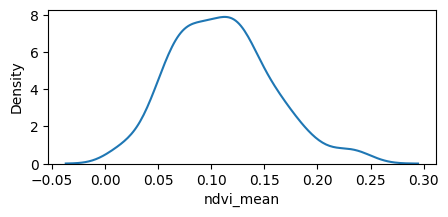

satatics:- 0.983 
 p:- 0.017
Above plot is NOT Normaly Distributer 
 



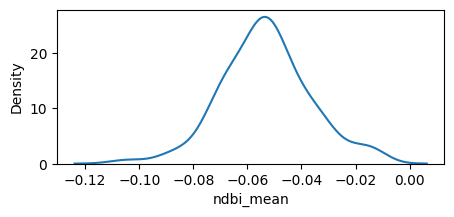

satatics:- 0.987 
 p:- 0.070
Above plot is Normaly Distributer 
 



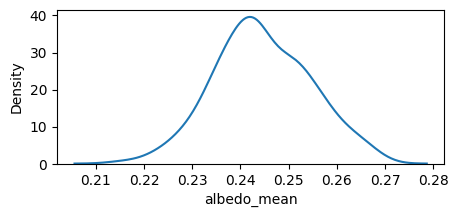

satatics:- 0.994 
 p:- 0.662
Above plot is Normaly Distributer 
 



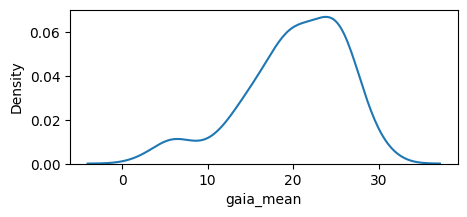

satatics:- 0.948 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



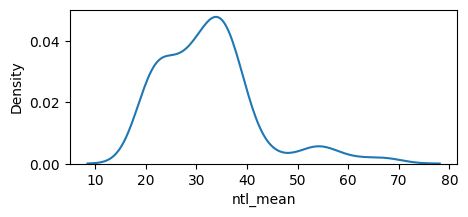

satatics:- 0.895 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



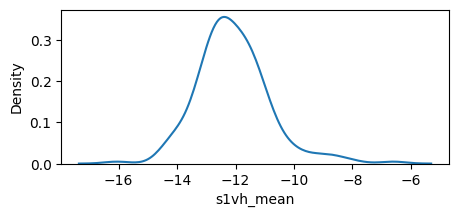

satatics:- 0.956 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



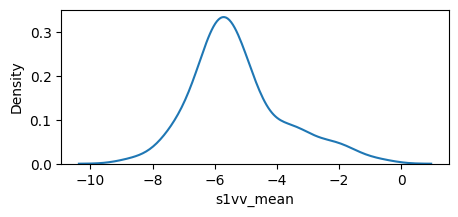

satatics:- 0.952 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



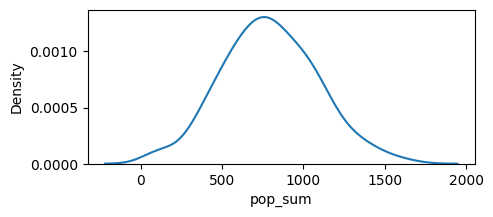

satatics:- 0.996 
 p:- 0.876
Above plot is Normaly Distributer 
 



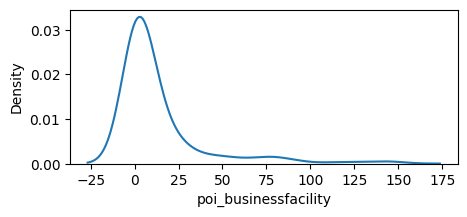

satatics:- 0.564 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



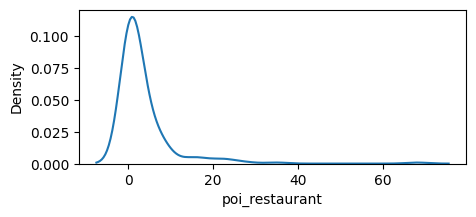

satatics:- 0.500 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



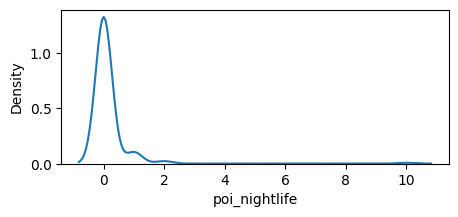

satatics:- 0.180 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



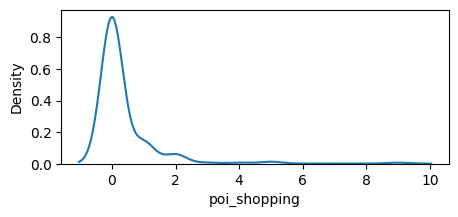

satatics:- 0.394 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



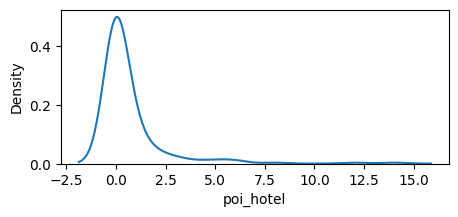

satatics:- 0.427 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



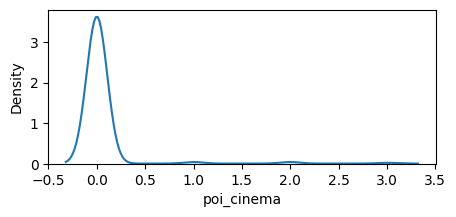

satatics:- 0.135 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



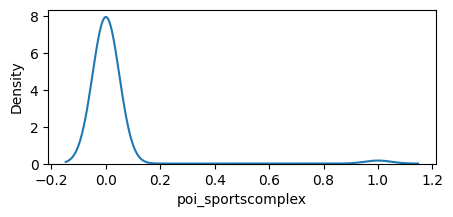

satatics:- 0.122 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



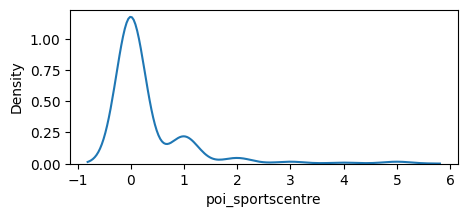

satatics:- 0.452 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



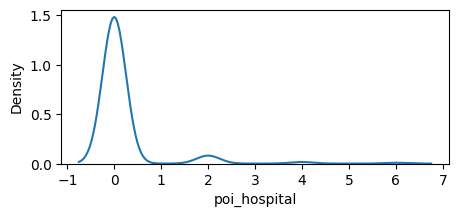

satatics:- 0.255 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



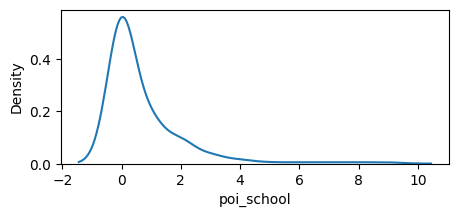

satatics:- 0.570 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



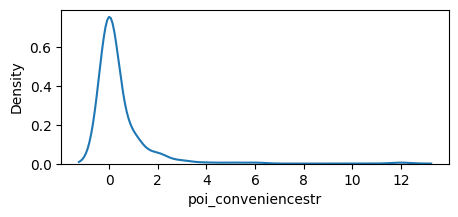

satatics:- 0.381 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



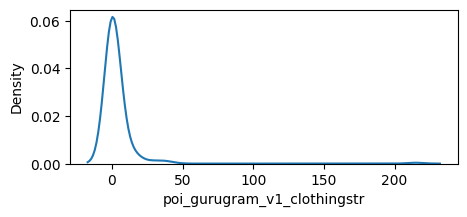

satatics:- 0.192 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



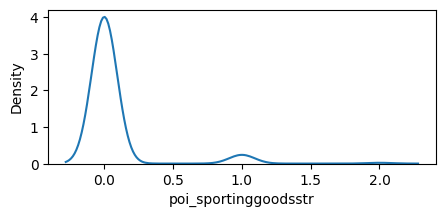

satatics:- 0.256 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



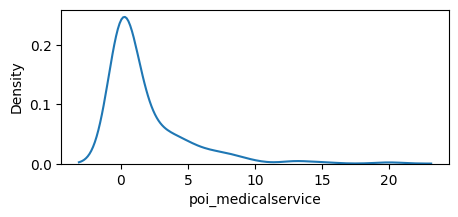

satatics:- 0.648 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



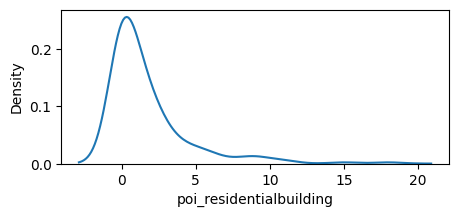

satatics:- 0.655 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



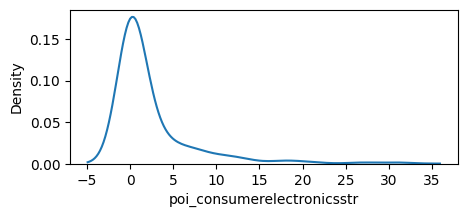

satatics:- 0.556 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



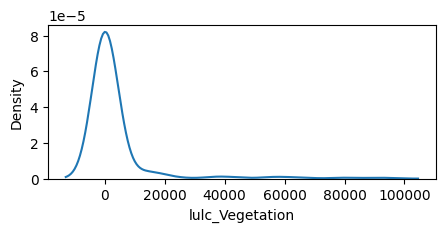

satatics:- 0.298 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



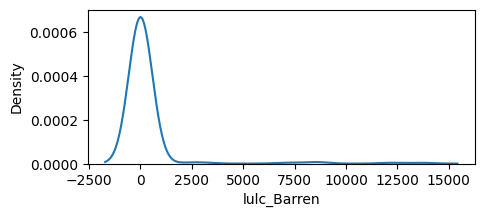

satatics:- 0.168 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



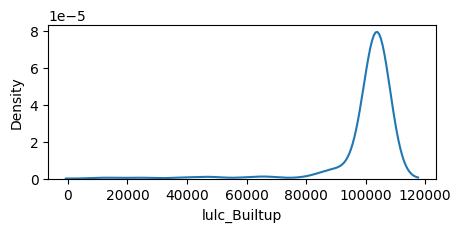

satatics:- 0.345 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



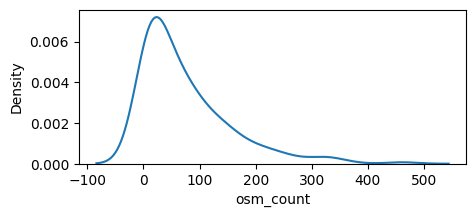

satatics:- 0.812 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



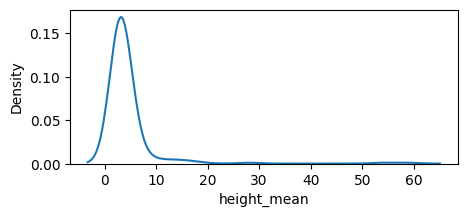

satatics:- 0.250 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



In [351]:
from scipy.stats import shapiro
for i in df_test.columns:
    stat,p = shapiro(df_test[i])
    plt.figure(figsize=(5,2))
    sns.kdeplot(data=df_test[i])
    plt.show()
    print("satatics:- {0:.3f}".format(stat),"\n","p:- {0:.3f}".format(p))
    if p>0.05:
        print("Above plot is Normaly Distributer","\n","\n")
    else:
        print("Above plot is NOT Normaly Distributer","\n","\n")
    

### Line charts of to show the similarity in pattern with tha data target variable 

C:\Users\chemi\AppData\Local\Temp\ipykernel_7196\1118547358.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots(figsize=(15,4))


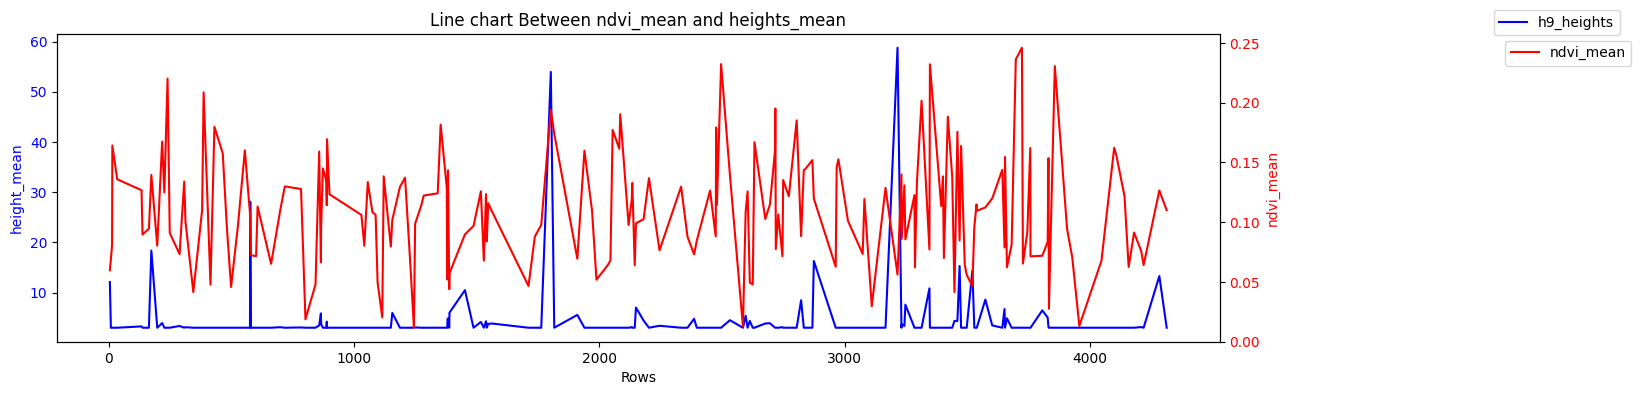

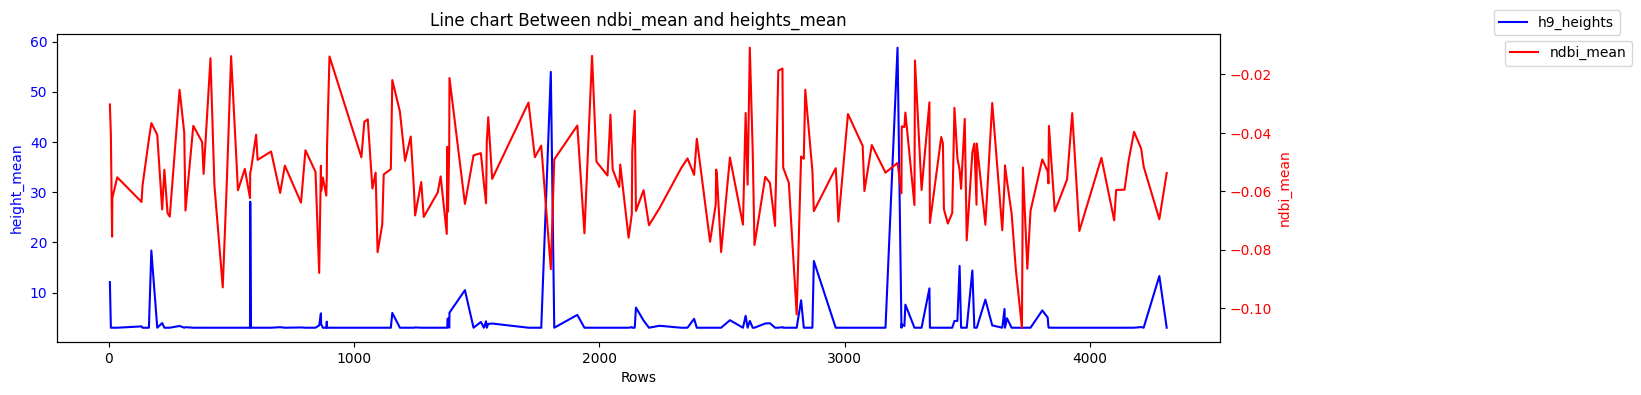

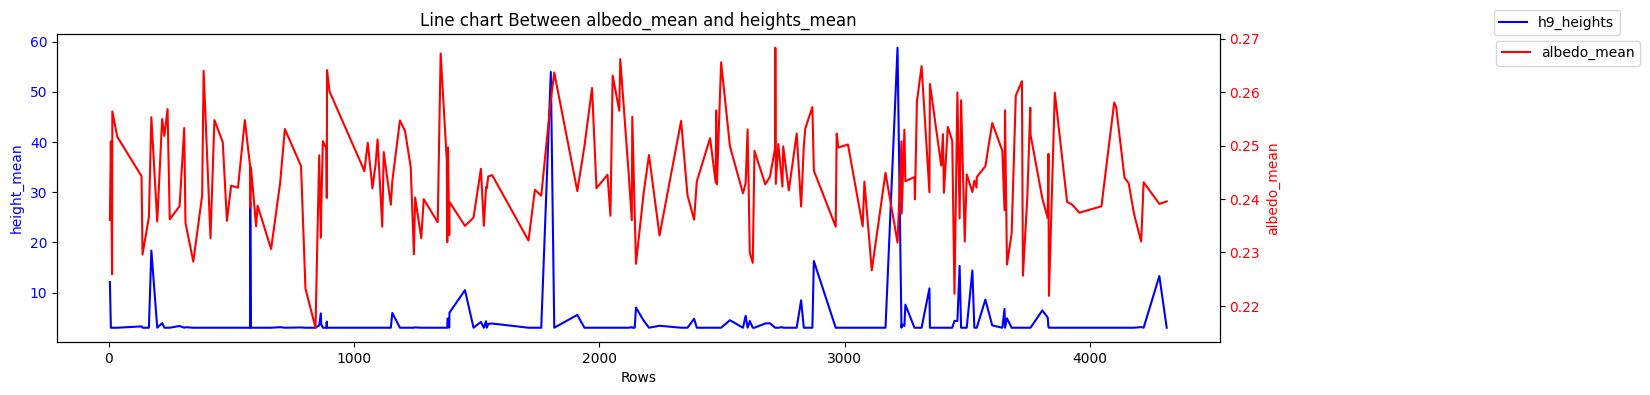

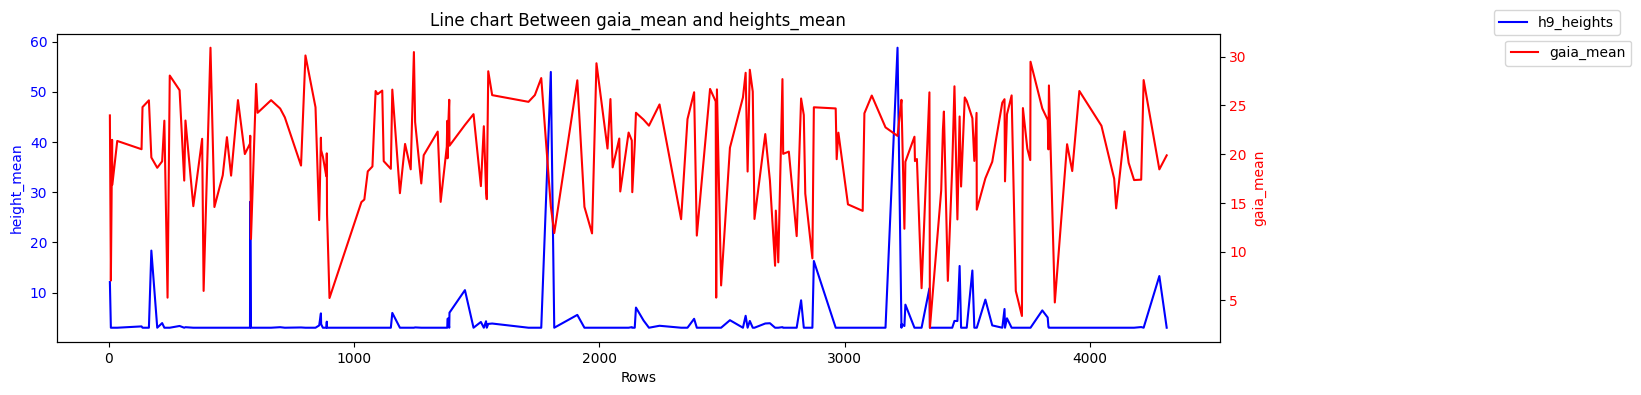

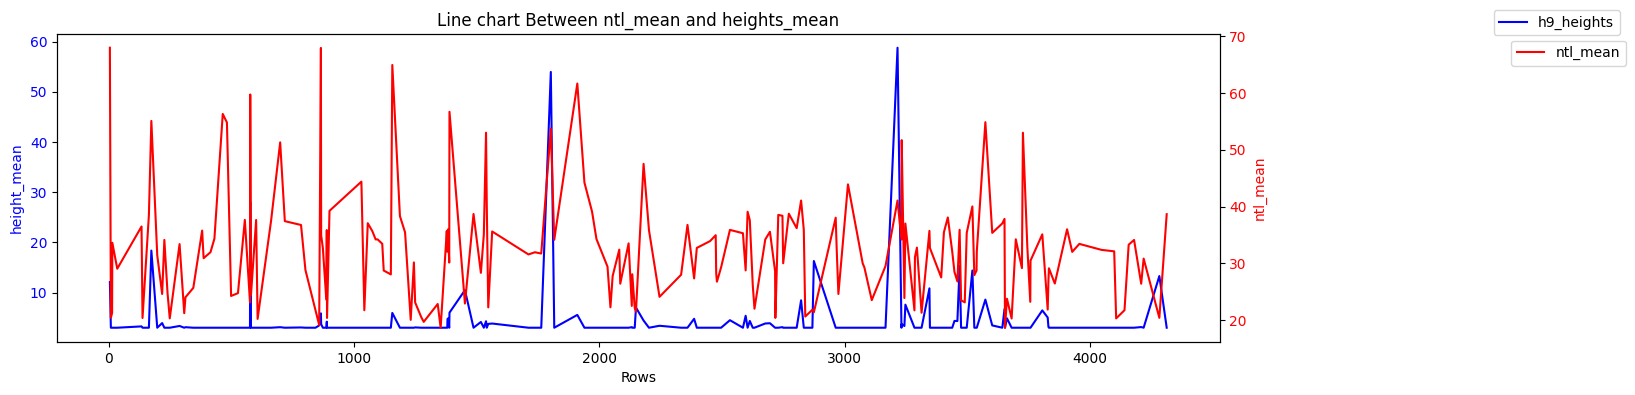

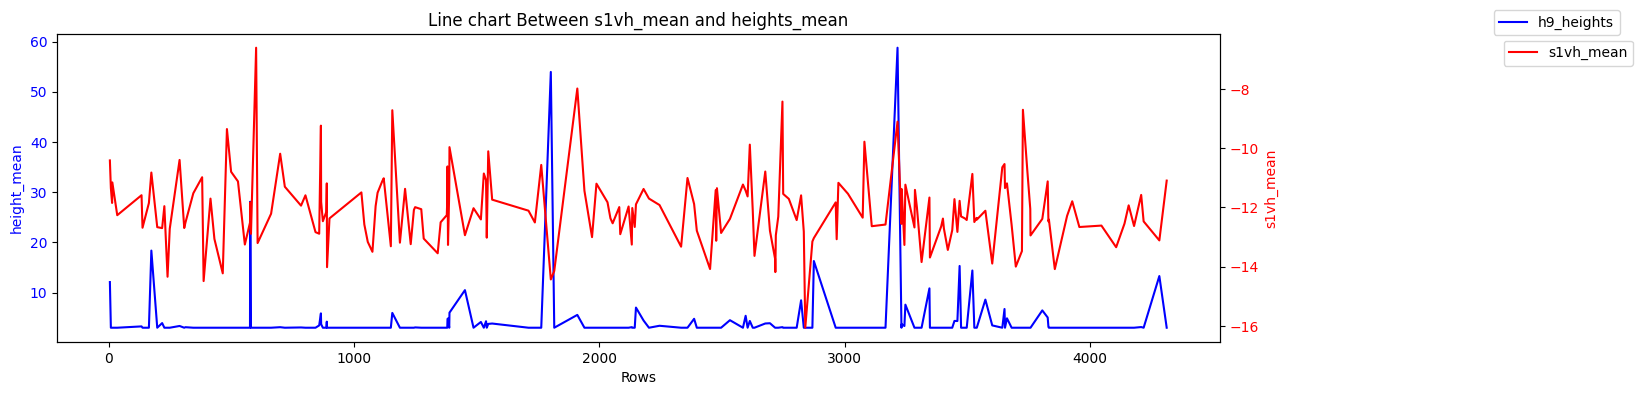

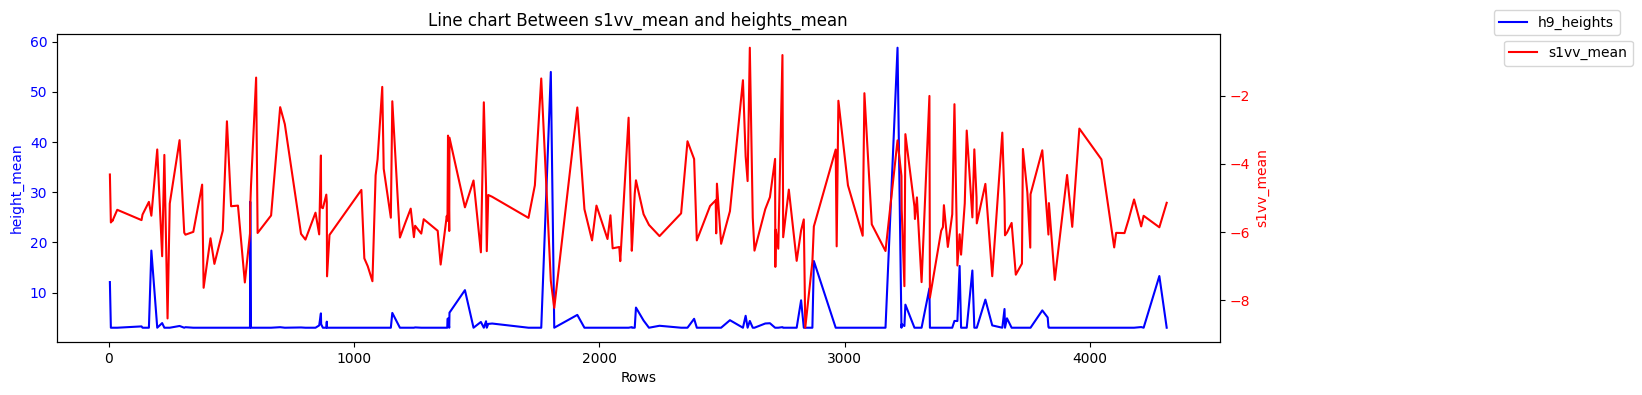

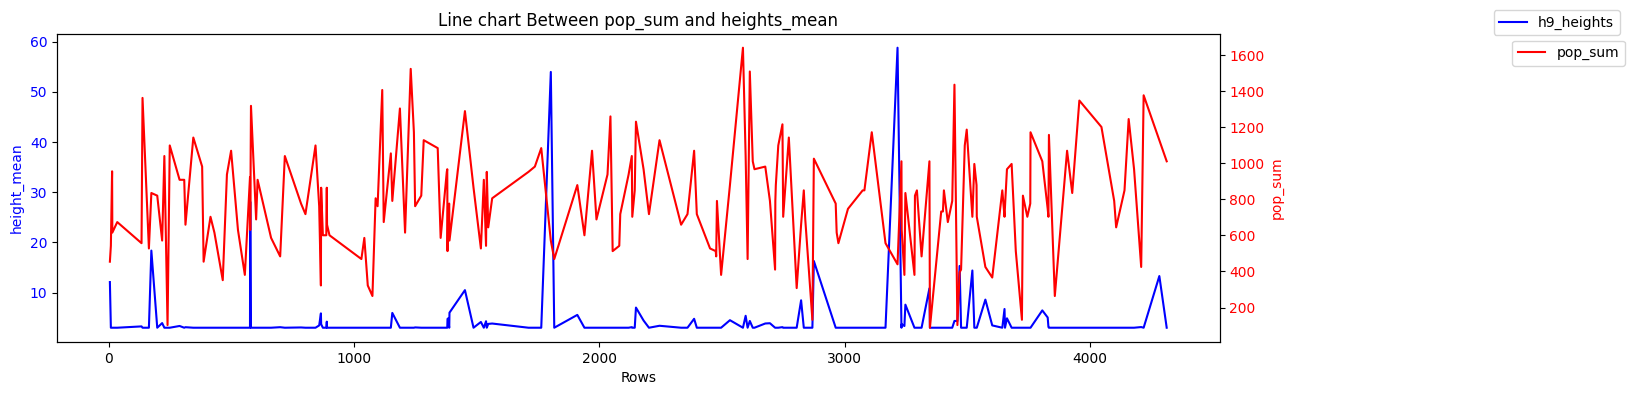

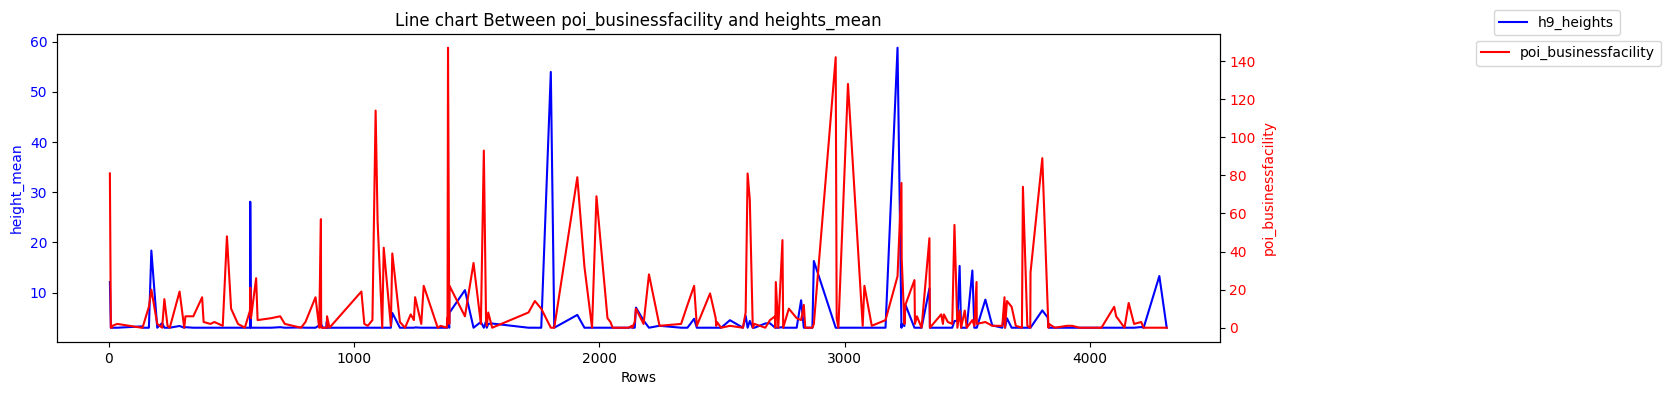

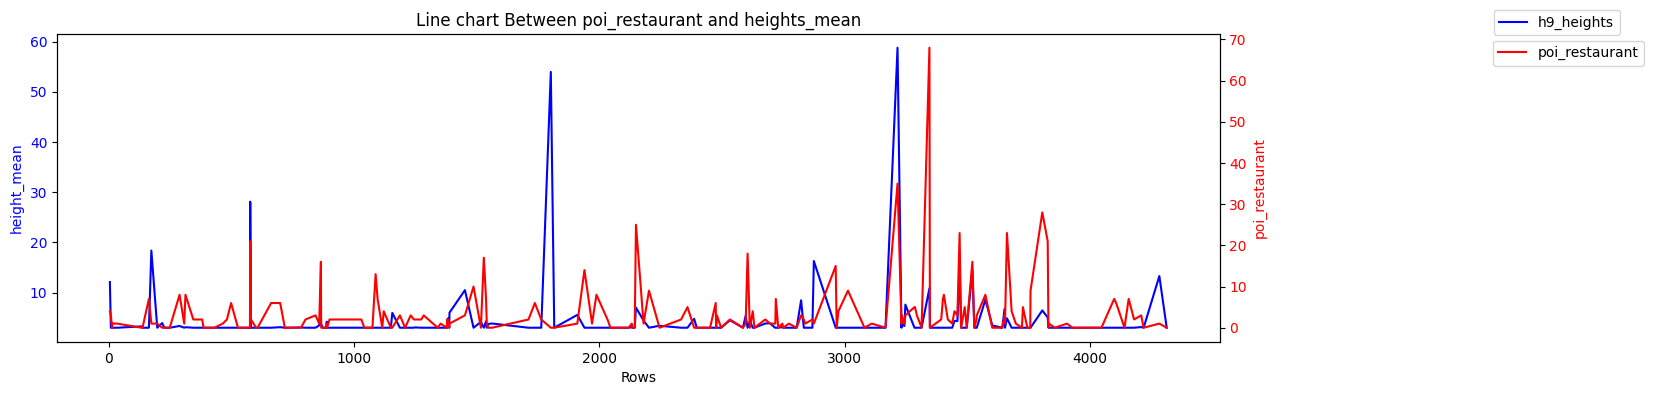

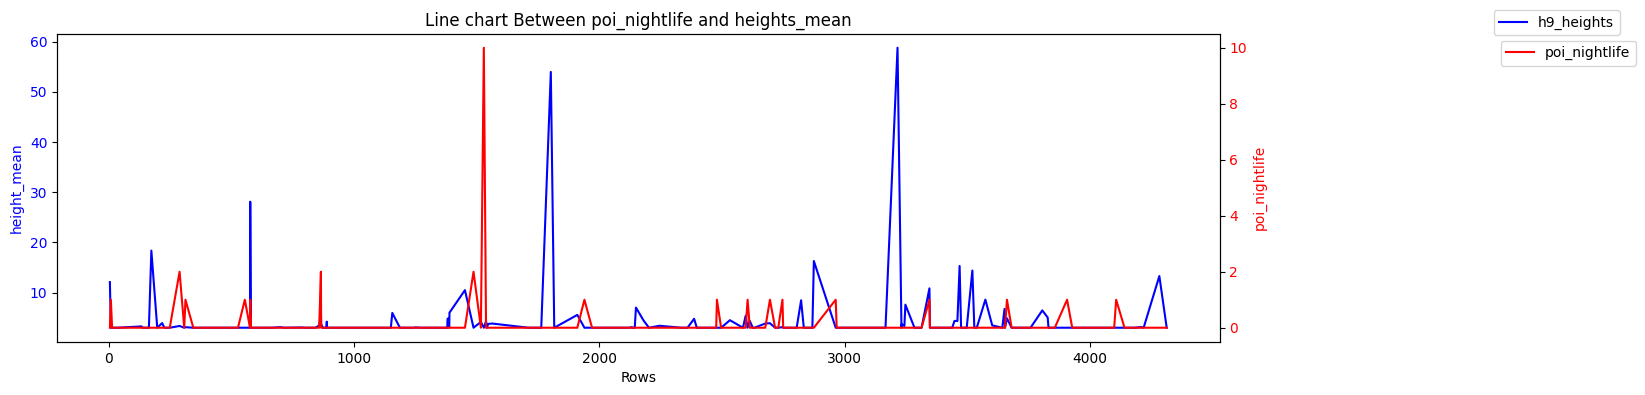

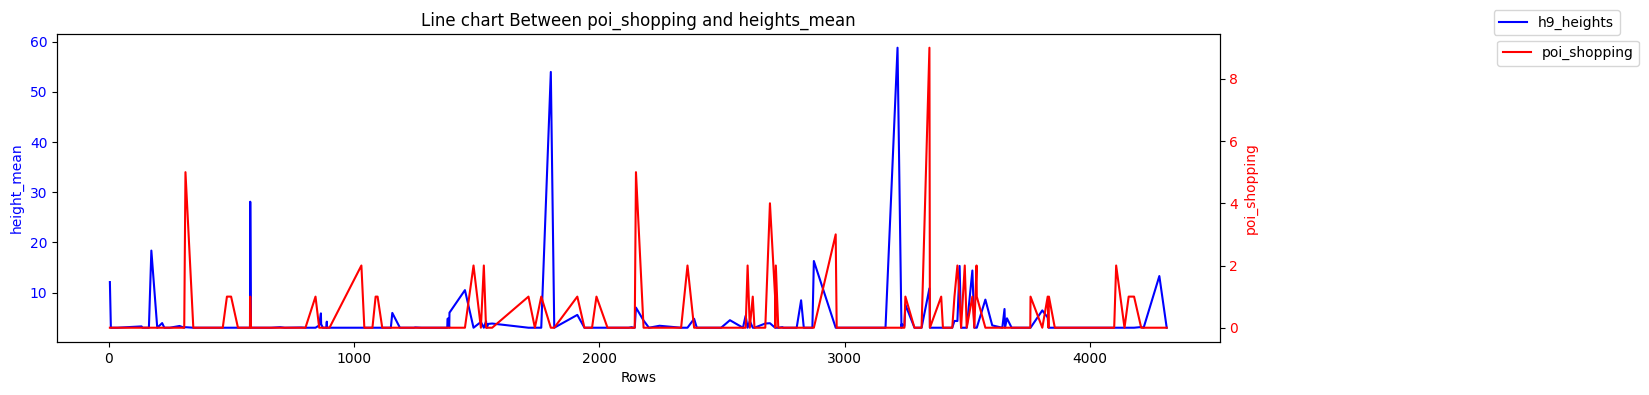

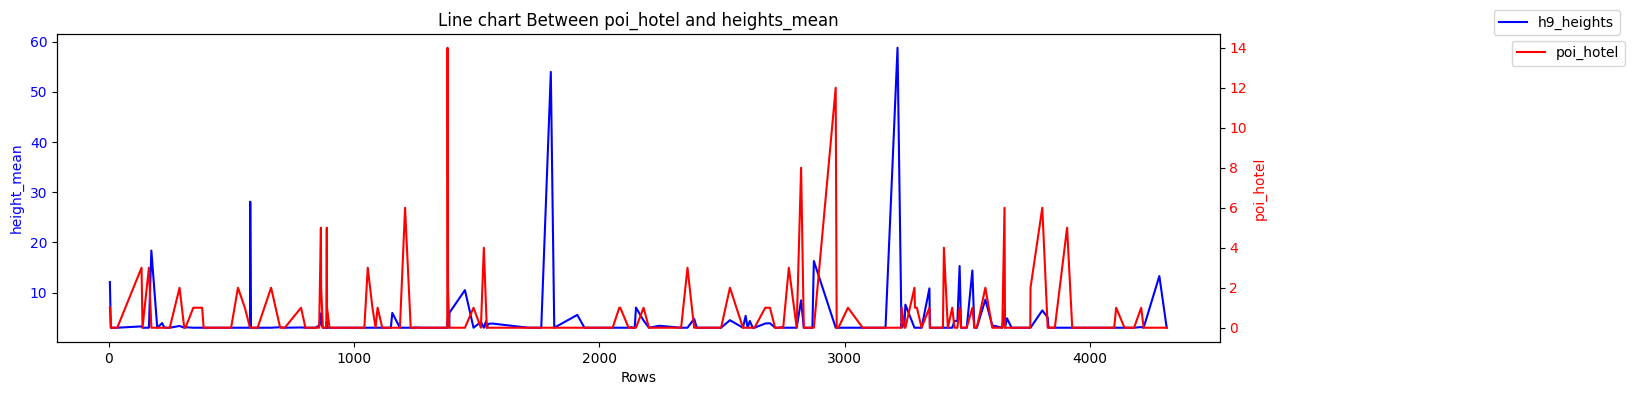

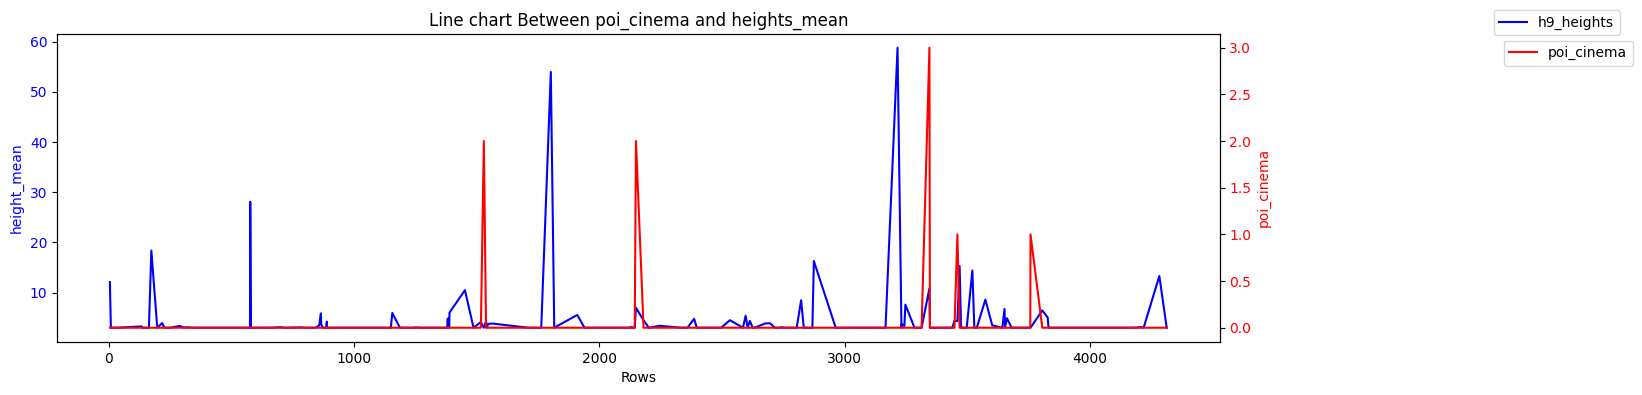

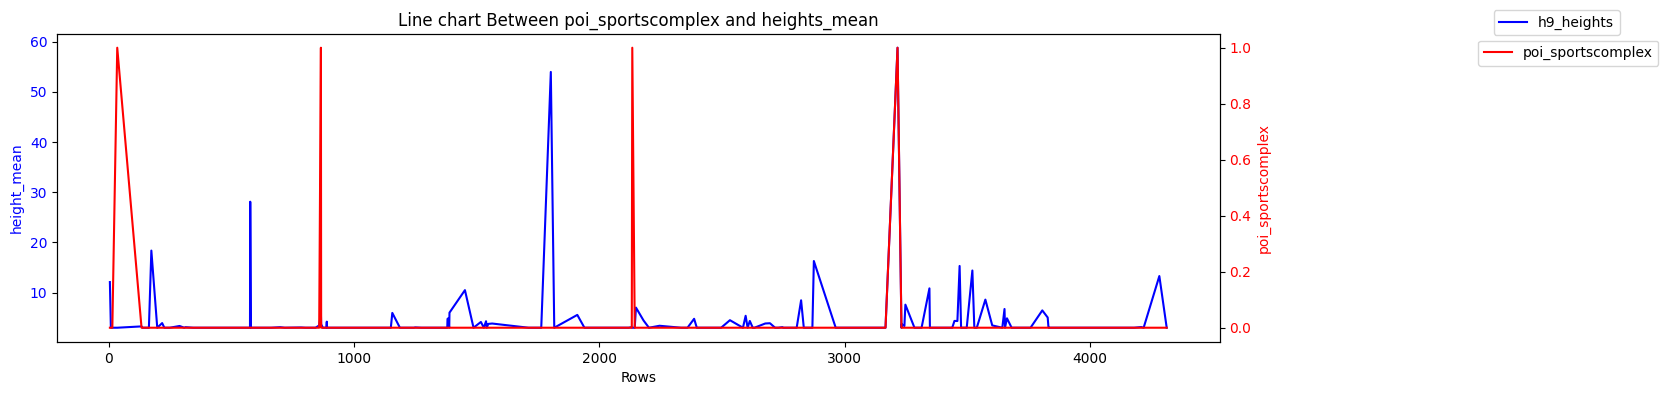

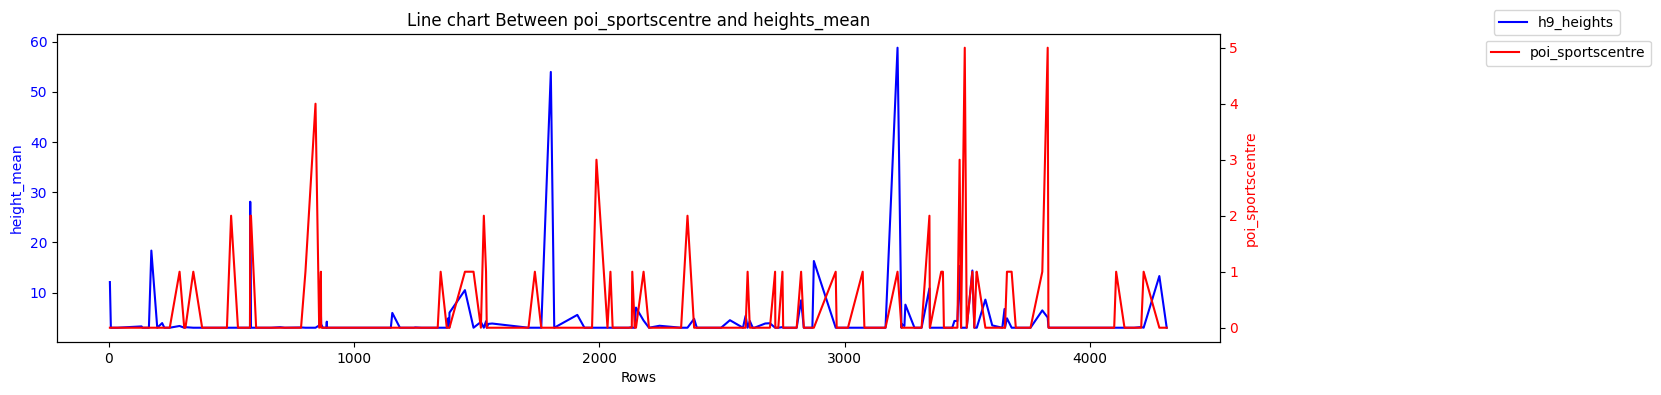

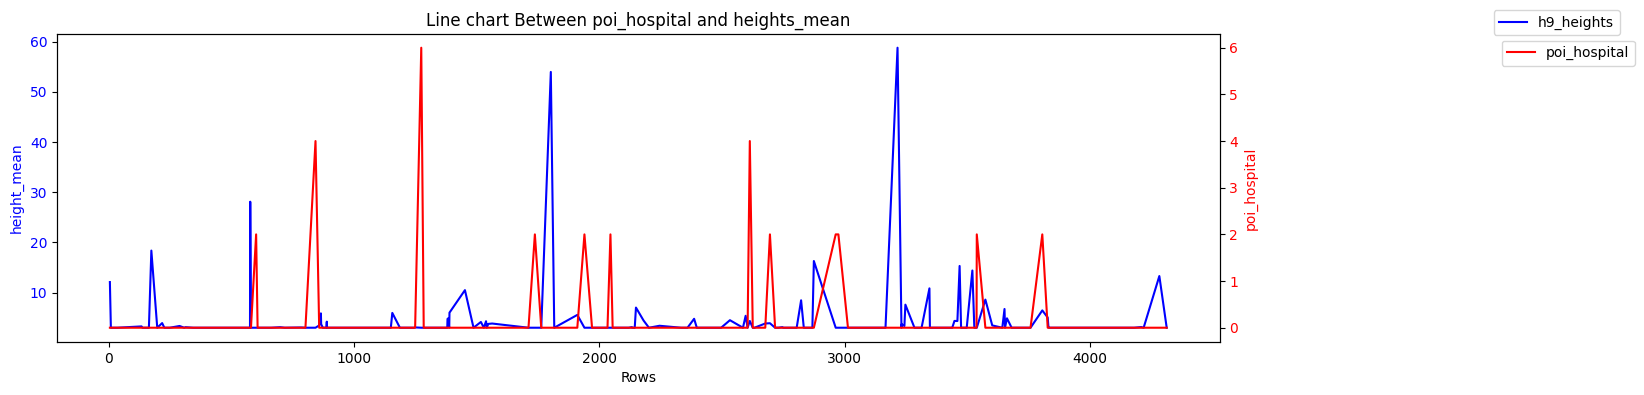

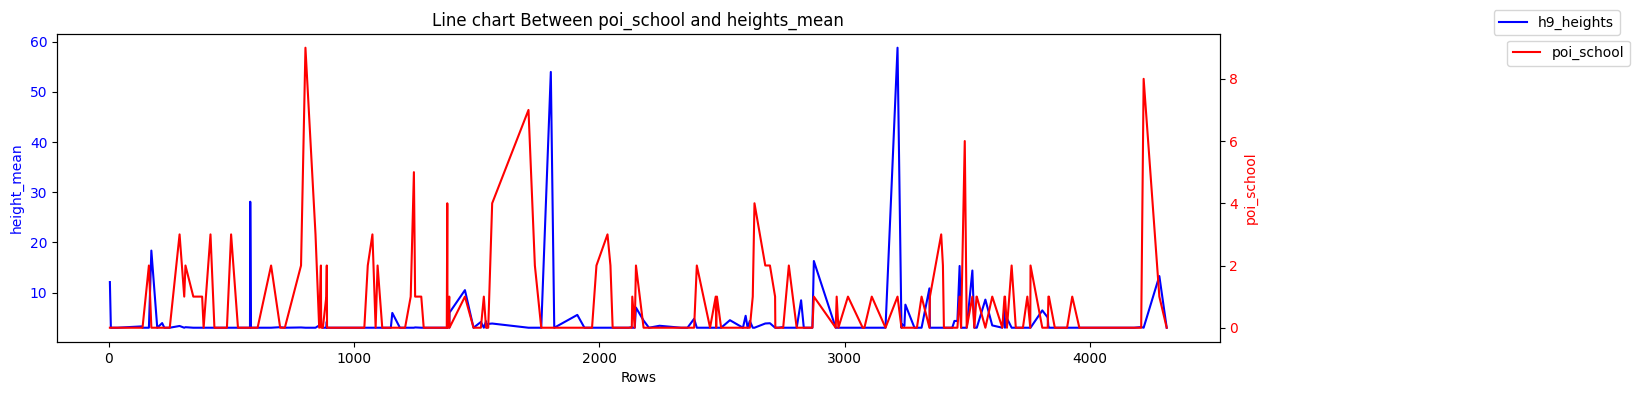

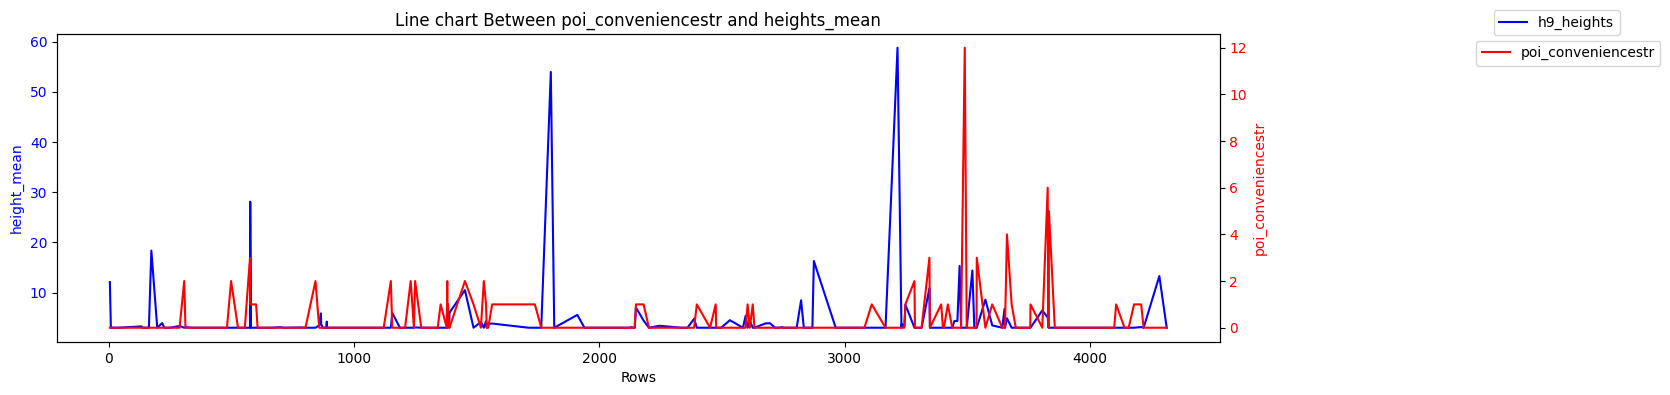

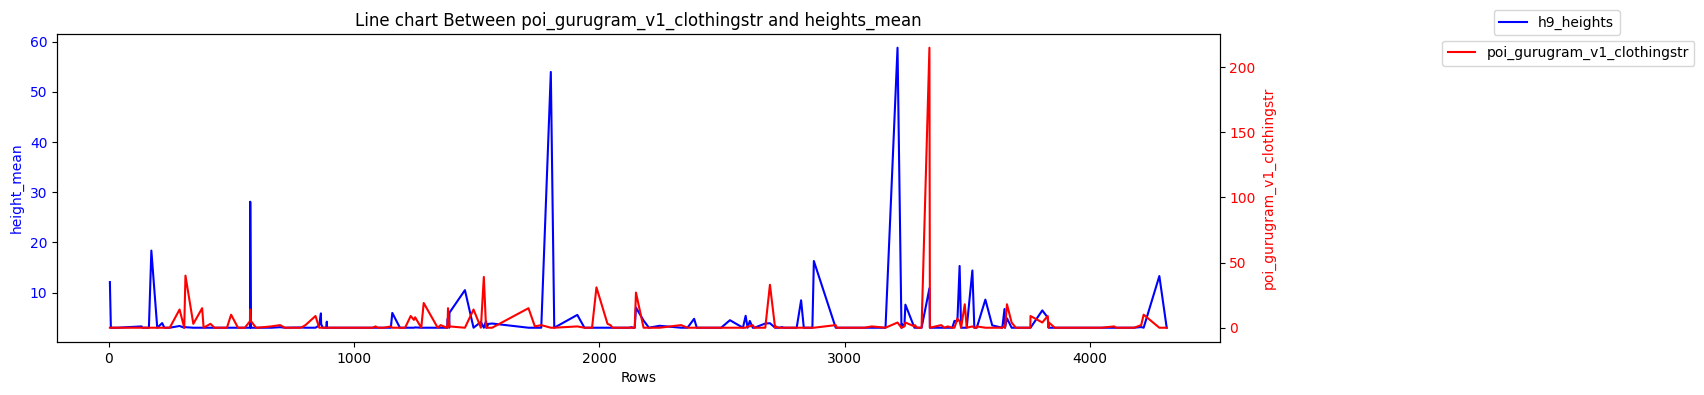

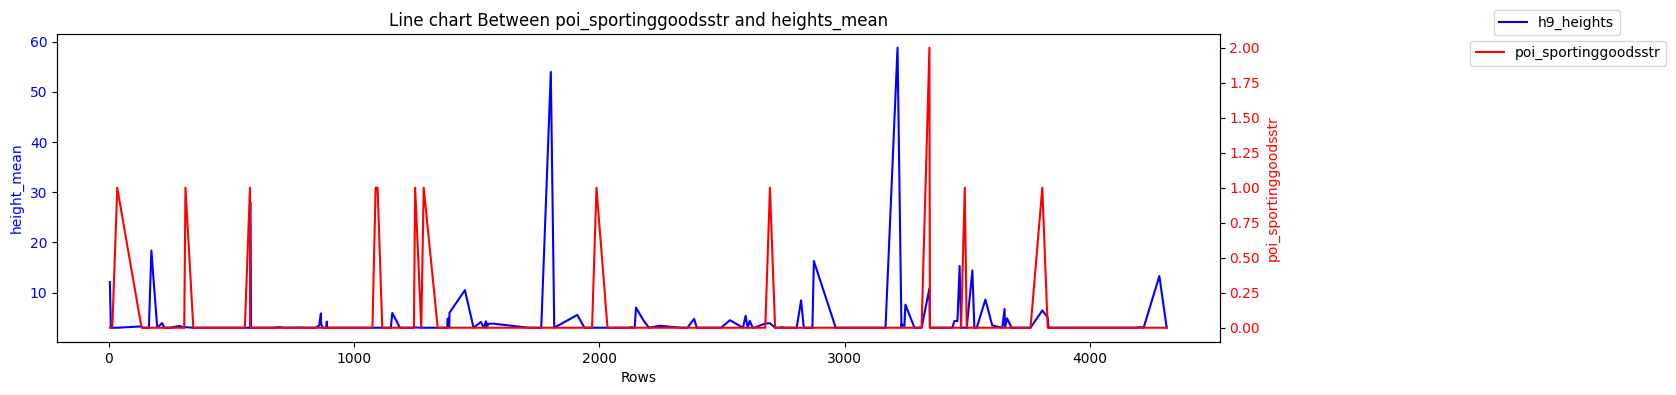

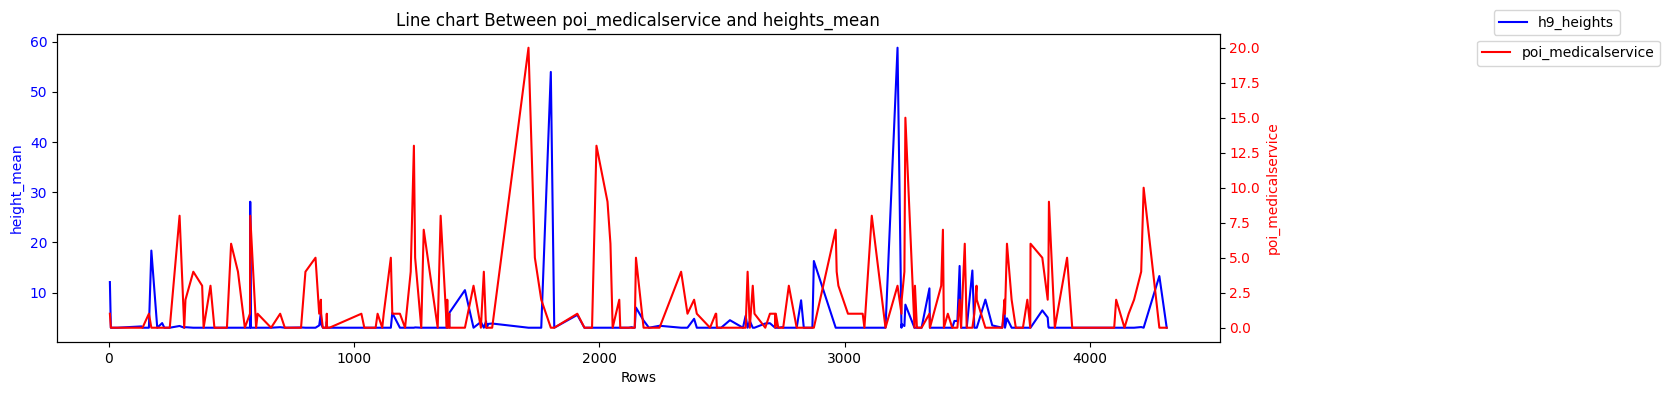

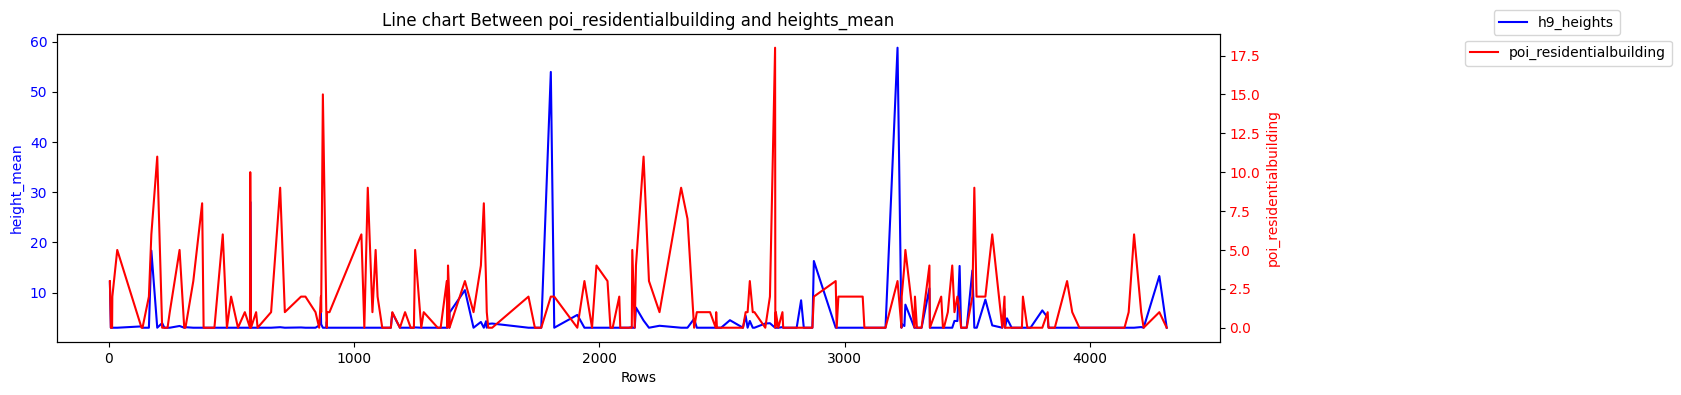

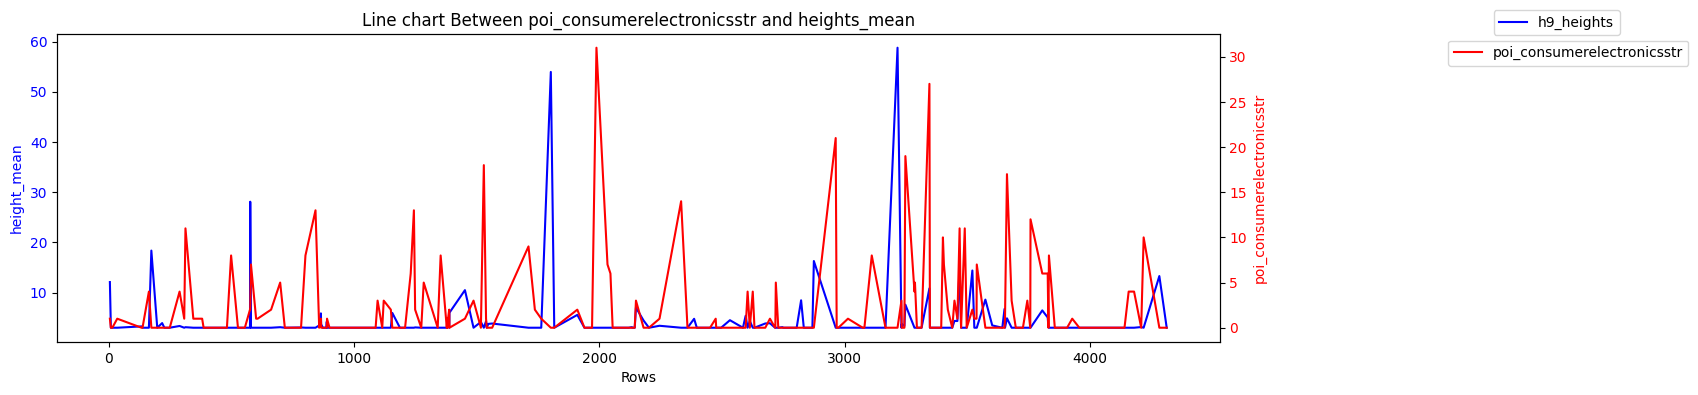

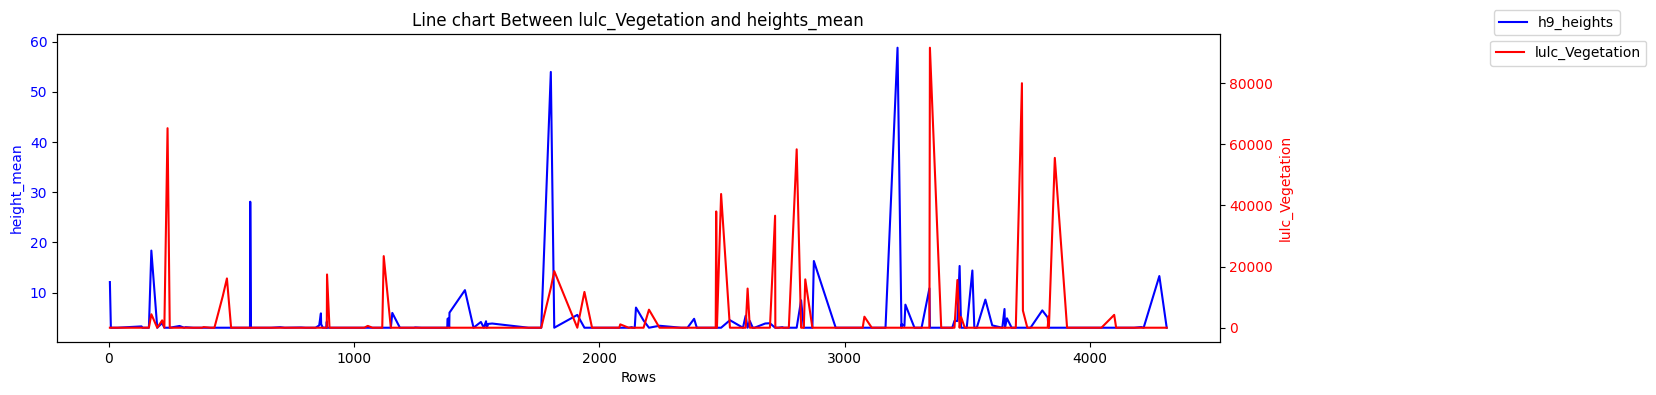

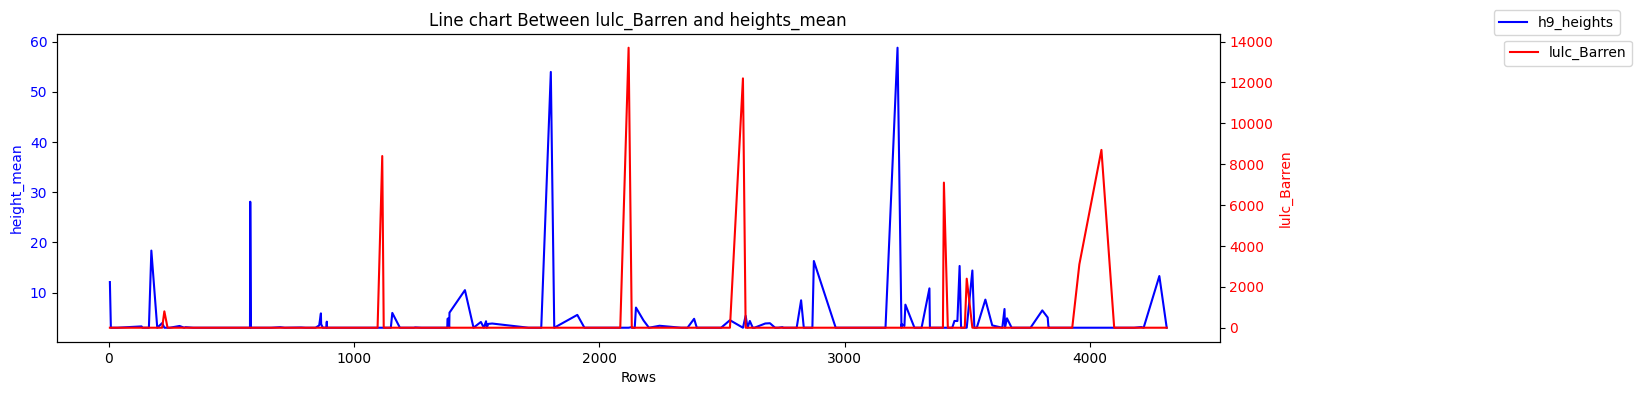

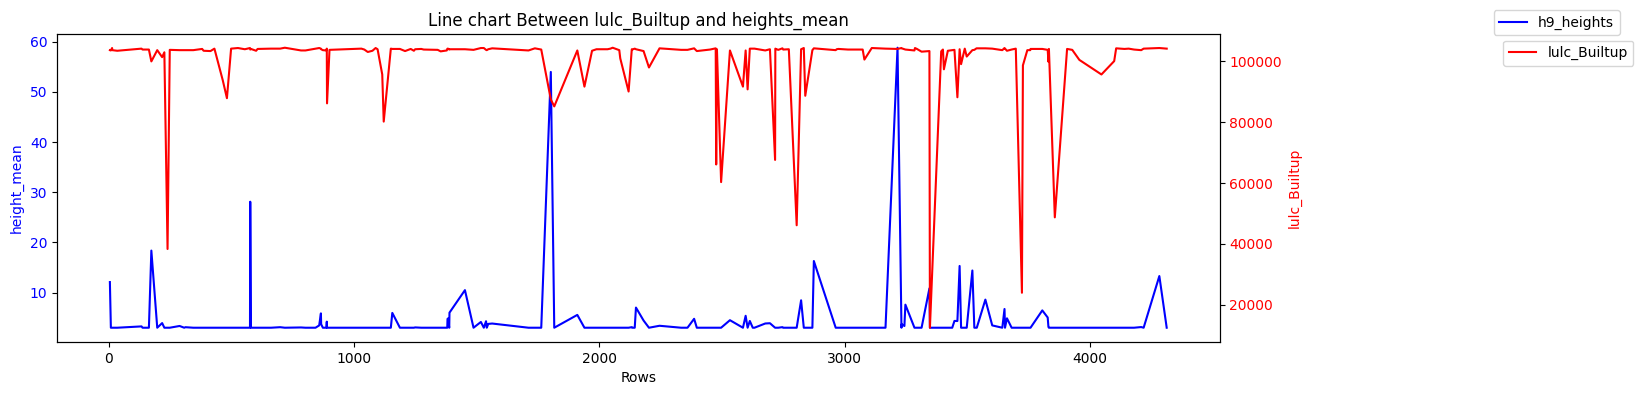

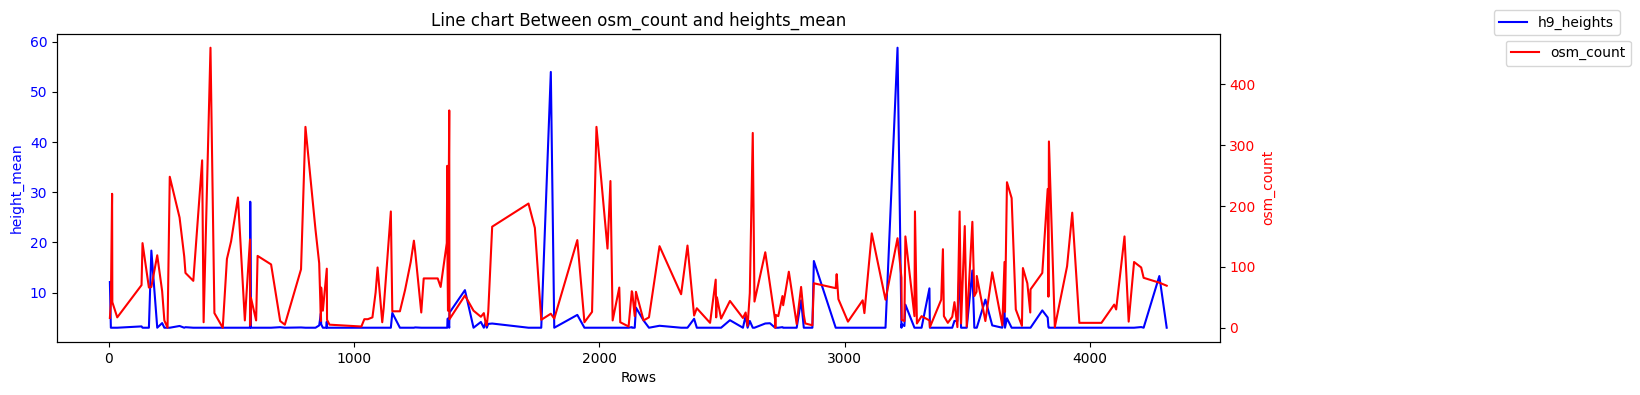

In [310]:
for i in df_test.columns[:-1]:
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax1.plot(df_test["height_mean"], color='blue',label="h9_heights")
    ax1.set_ylabel("height_mean", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    plt.legend(bbox_to_anchor=(1.29, 1.1), loc='upper center')
   

    ax2 = ax1.twinx()
    ax2.plot(df_test[i] , color='red',label=i)
    #ax2.set_ylim(0, 1)  # set the range for the second axis
    ax2.set_ylabel(i, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper center')
    
   
    
    ax1.set_xlabel('Rows')
    ax1.set_title(f'Line chart Between {i} and heights_mean')
    


#### Here is the boxplot which shows  outlier present in each column but s1_vh_mean and h8_heights_mean have more outlier

C:\Users\chemi\AppData\Local\Temp\ipykernel_7196\3756662529.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,2))


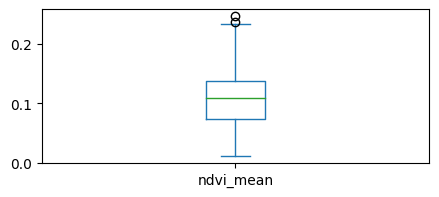

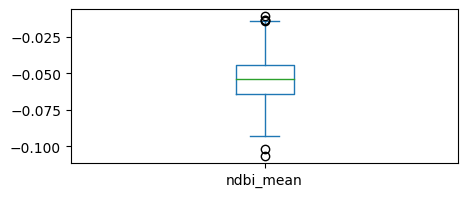

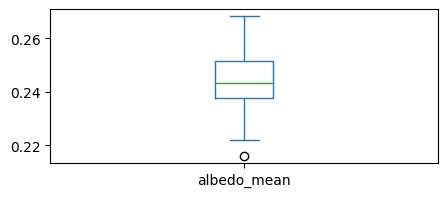

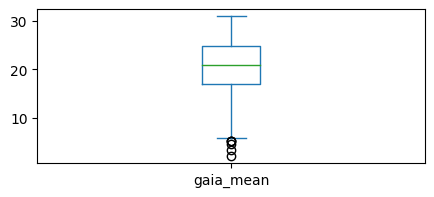

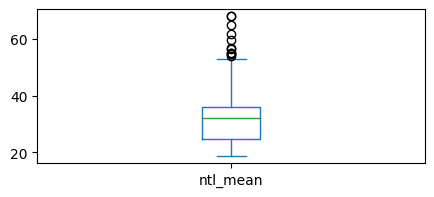

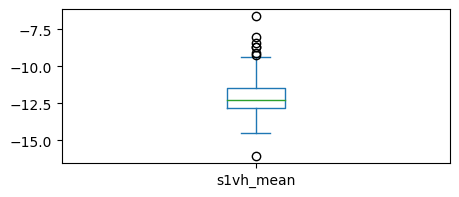

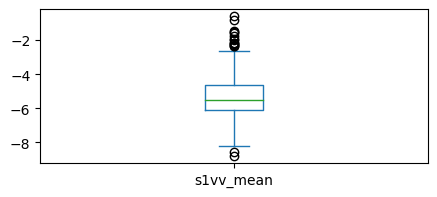

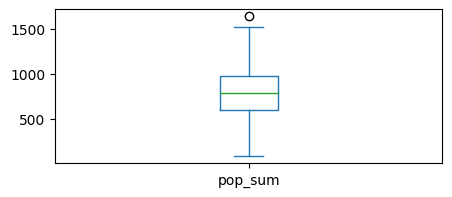

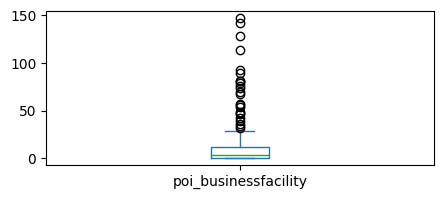

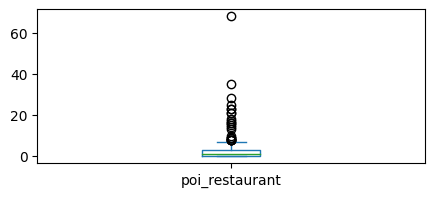

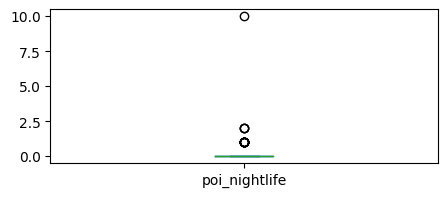

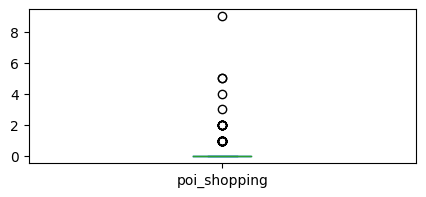

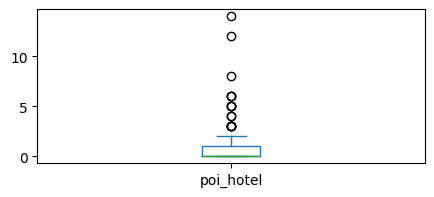

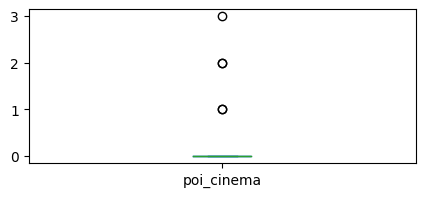

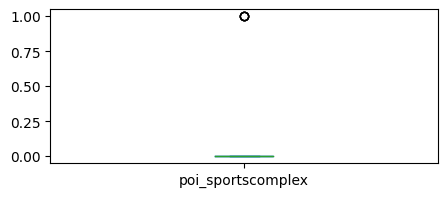

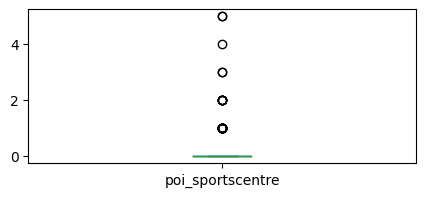

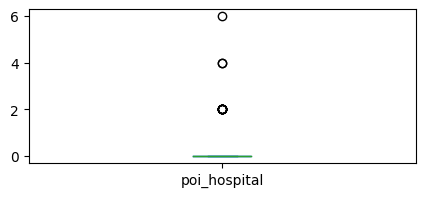

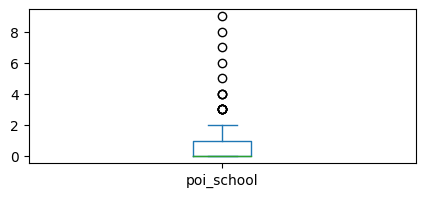

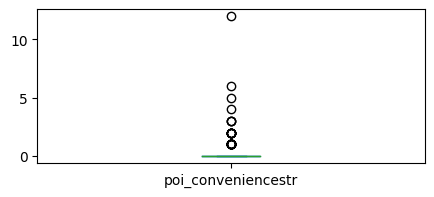

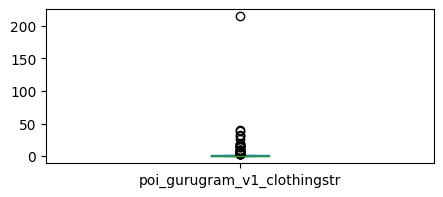

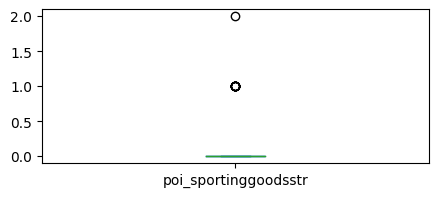

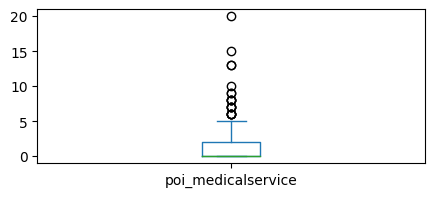

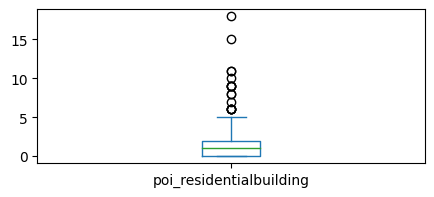

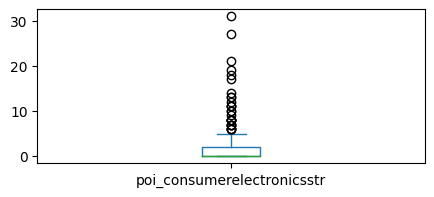

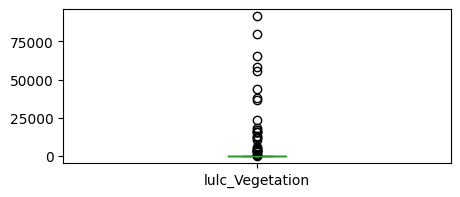

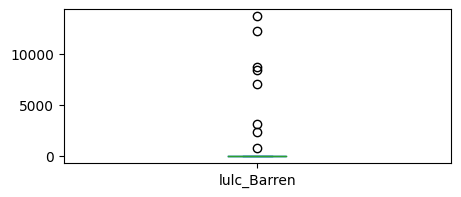

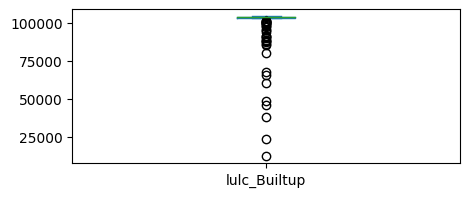

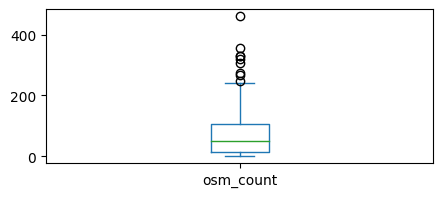

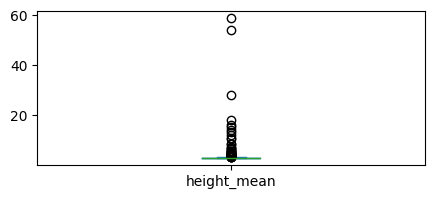

In [311]:
for i in df_test.columns:
    plt.figure(figsize=(5,2))
    df_test[i].plot(kind="box")
    #there is some outlier in  s1_vh_mean and h8_heights_mean

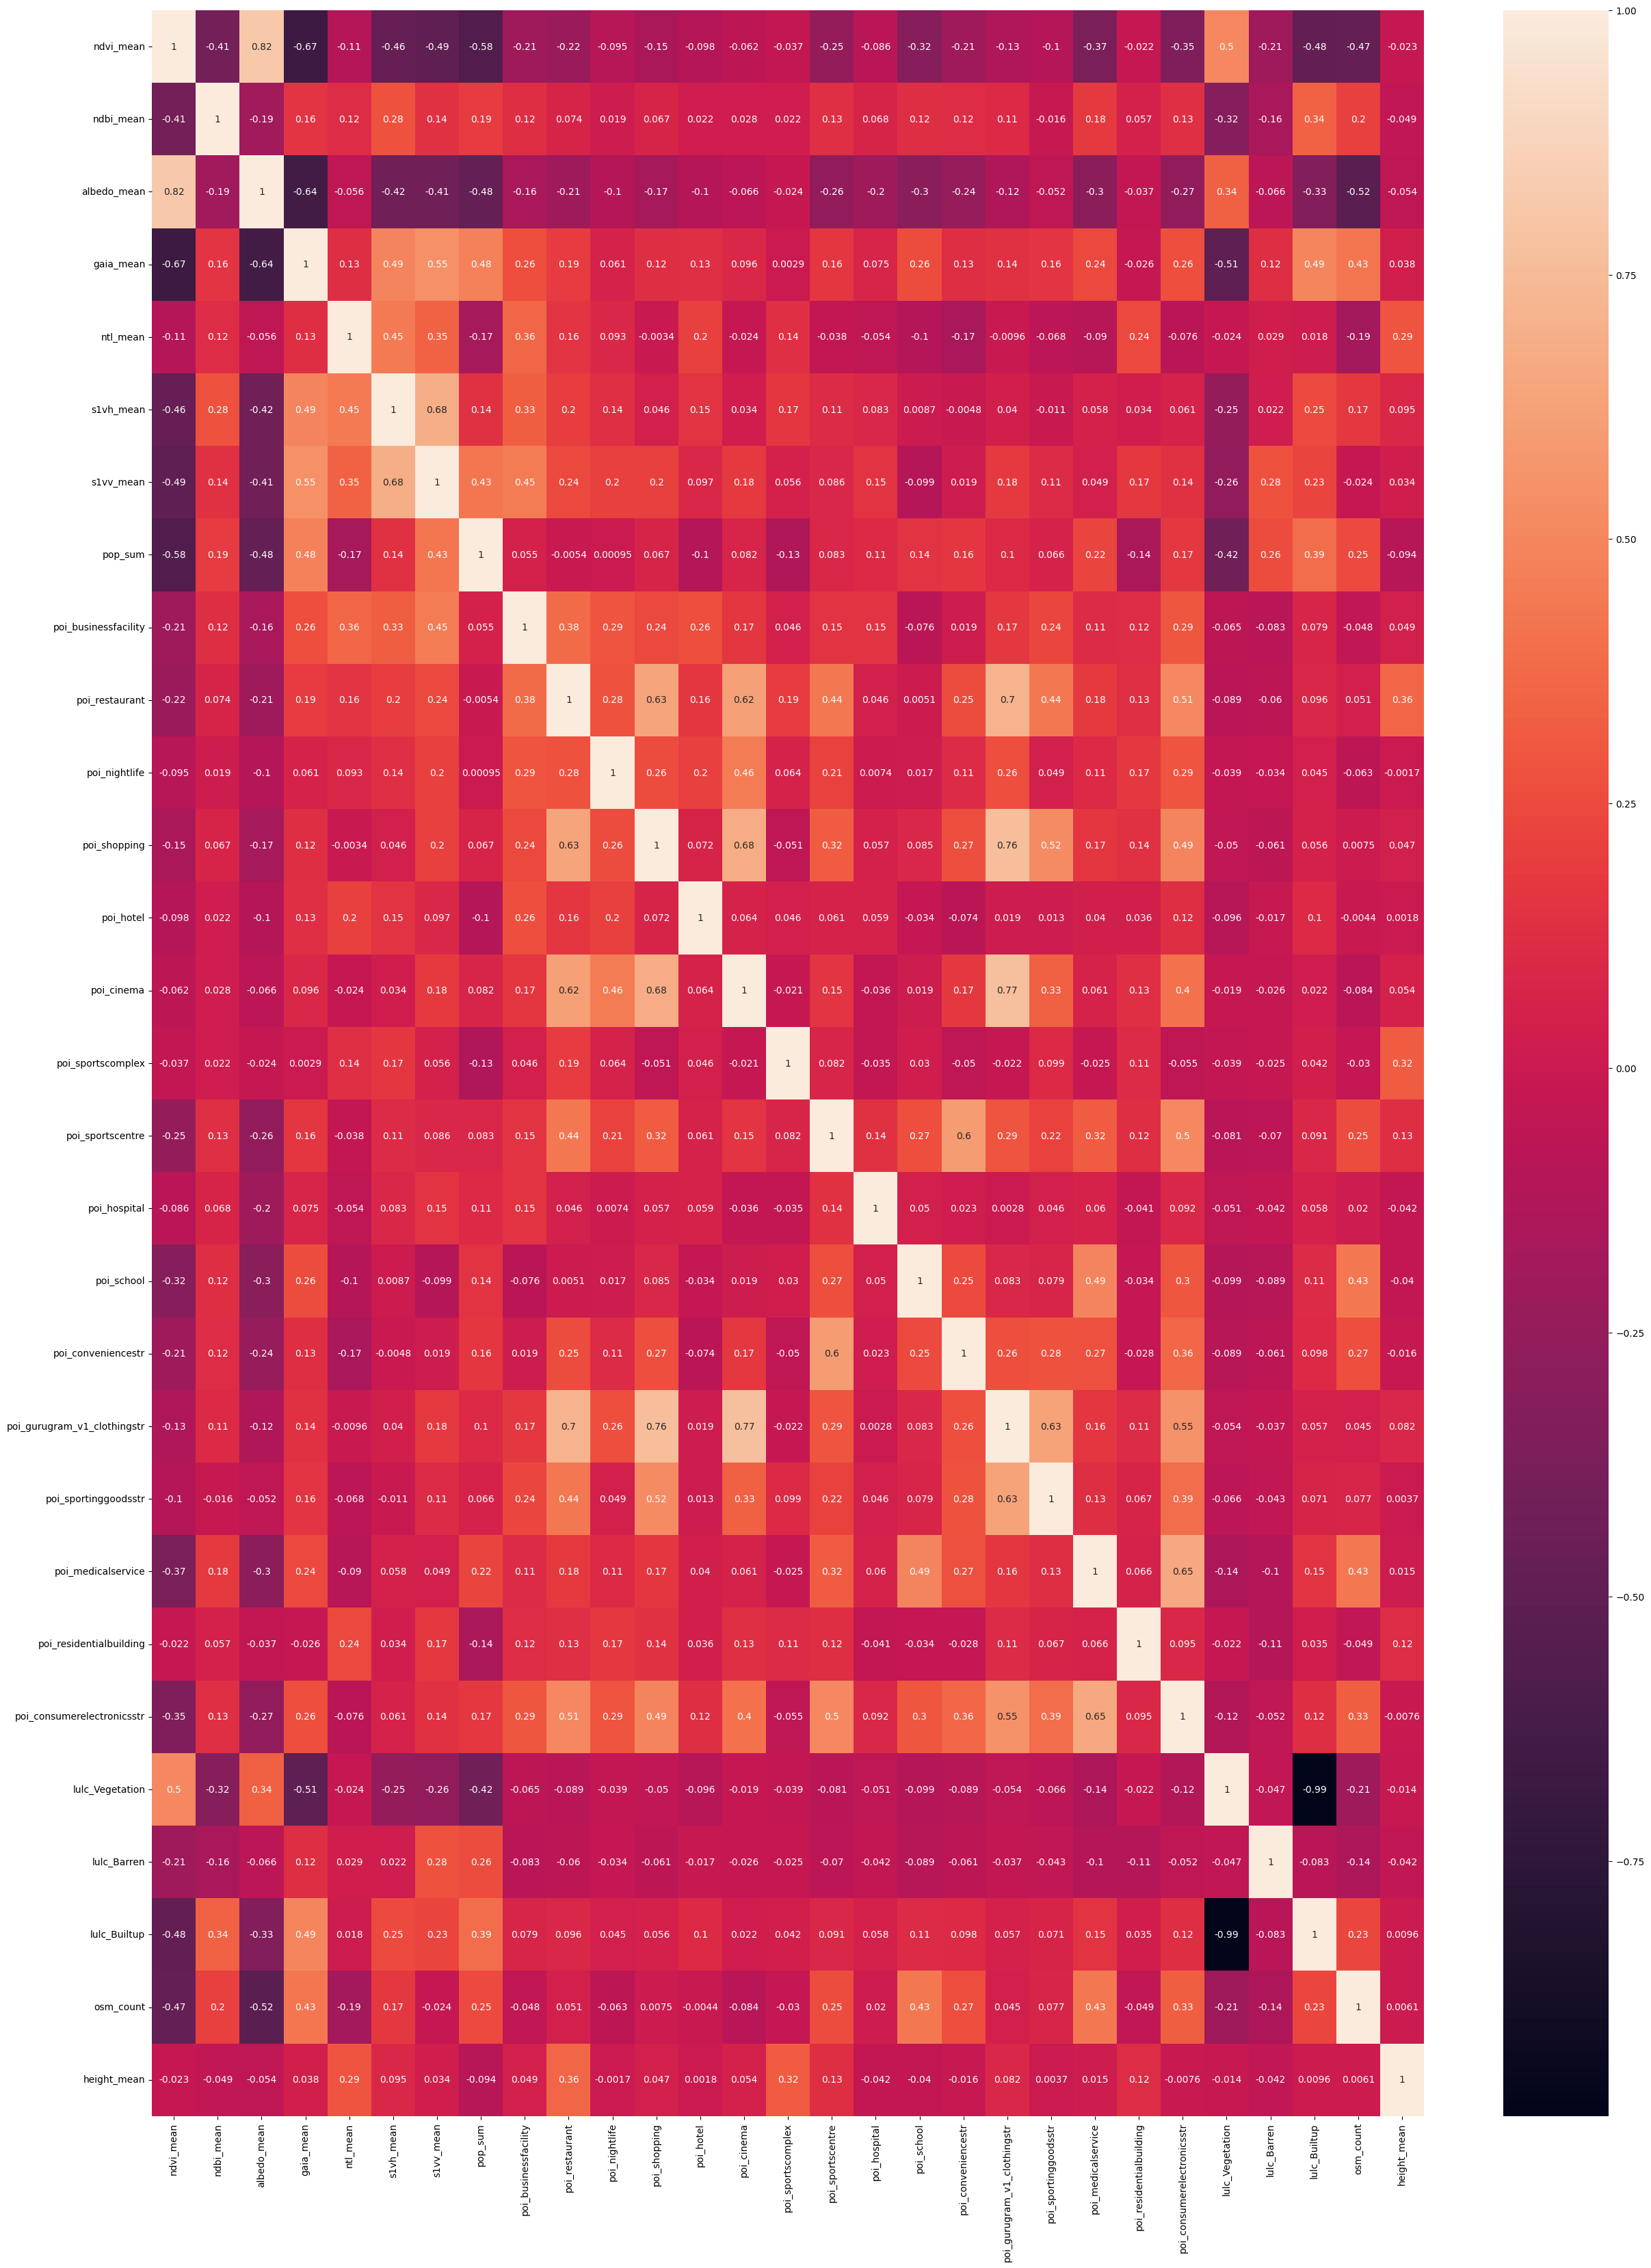

In [408]:
plt.figure(figsize=(30,40))
sns.heatmap(df_test.corr(),annot=True)
plt.show()
# There is highest positive correlation btw albedo_mean & ndvi_mean 
# There is highest negative correlation btw gaib_mean and h8_heights_mean

### Scatter plot shows the distribution of column with respect to height

C:\Users\chemi\AppData\Local\Temp\ipykernel_7196\3627519083.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


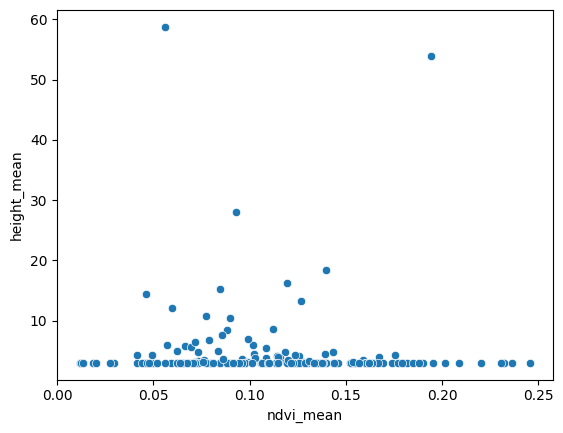

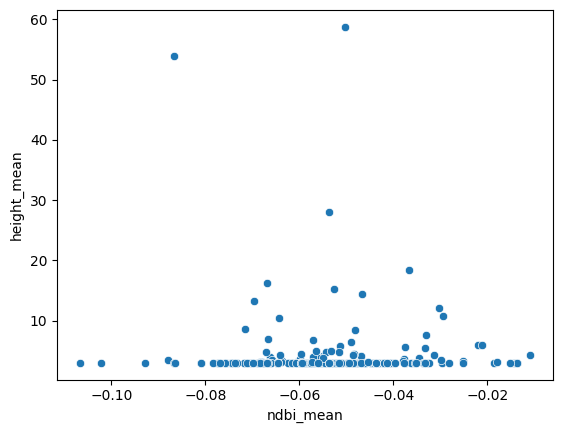

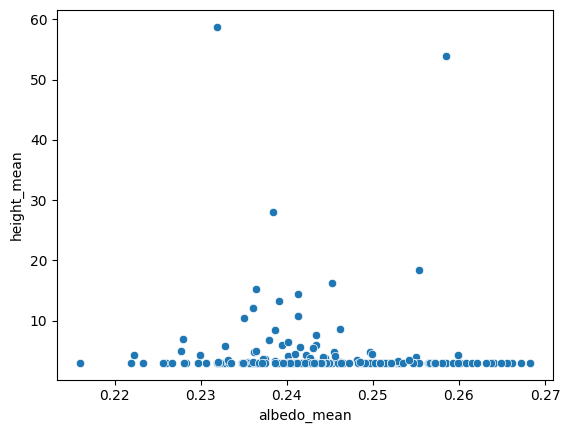

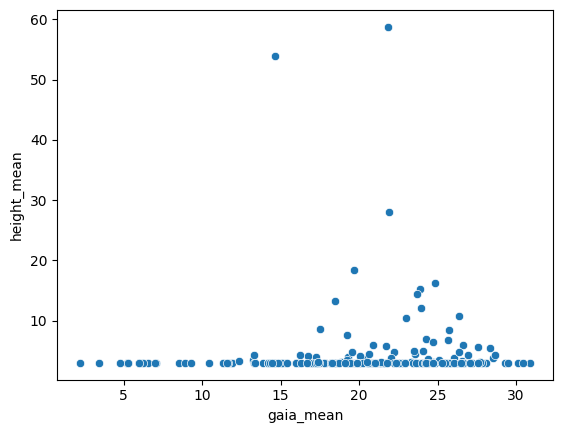

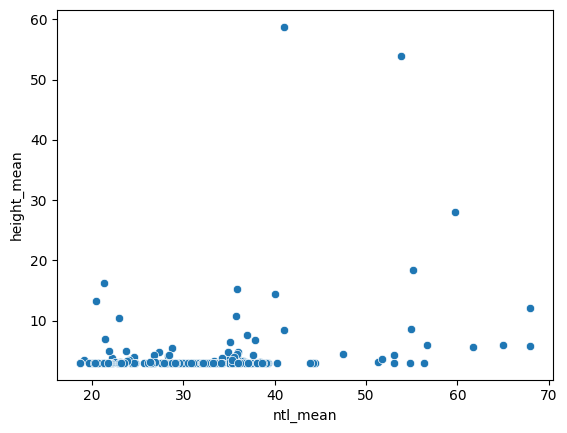

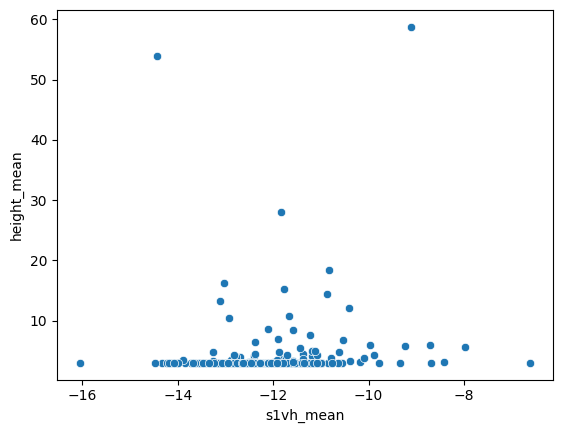

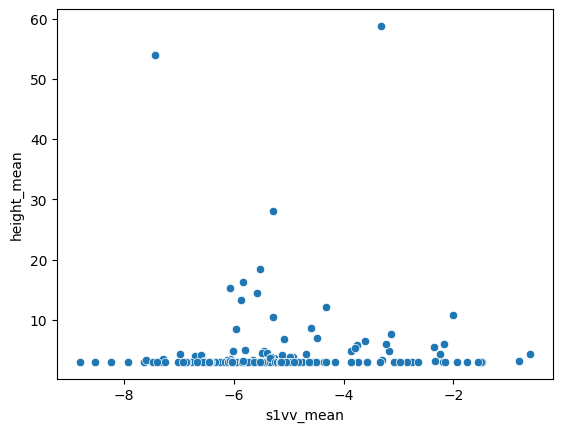

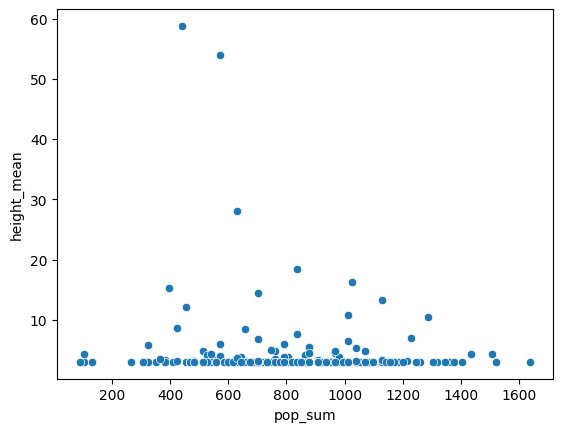

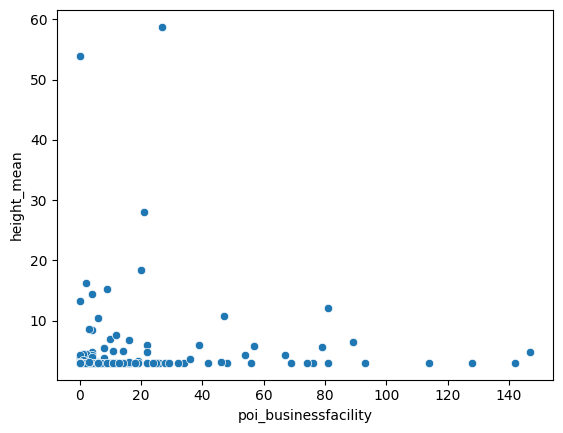

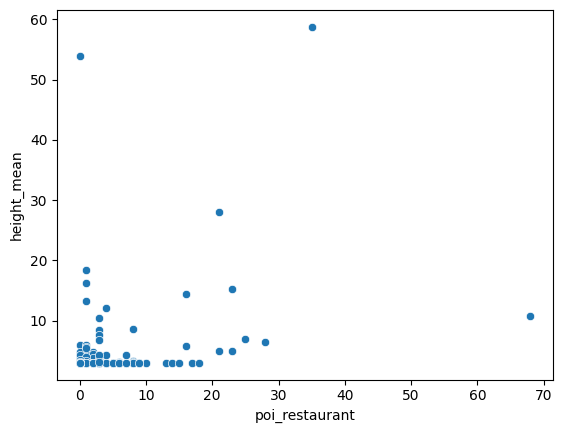

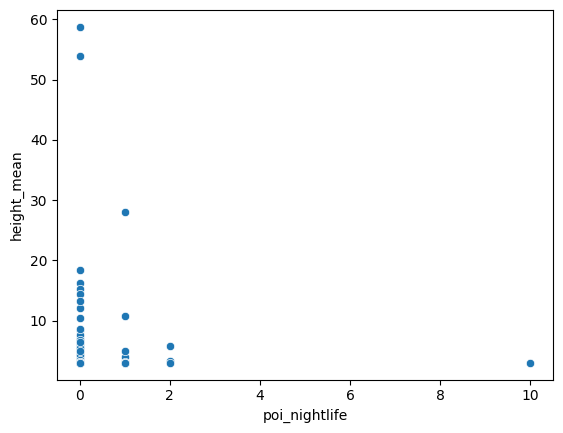

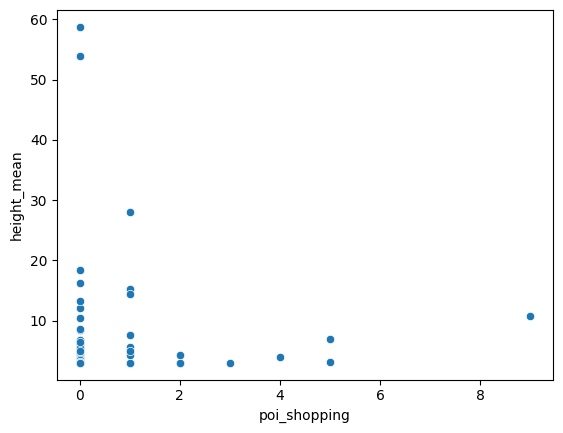

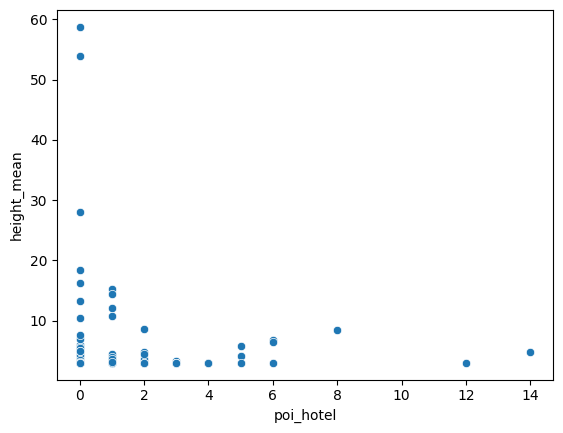

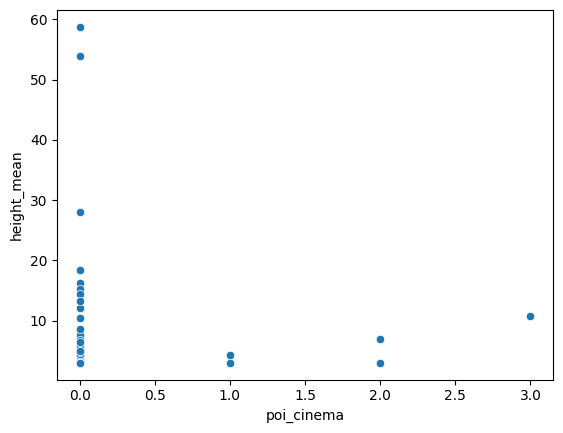

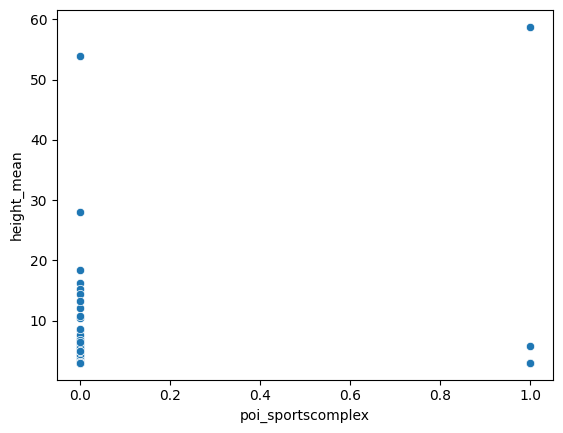

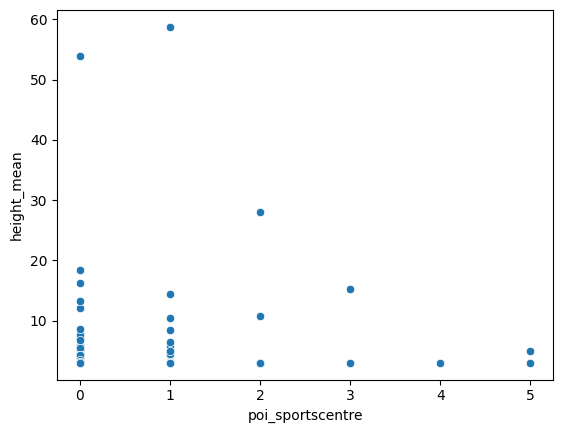

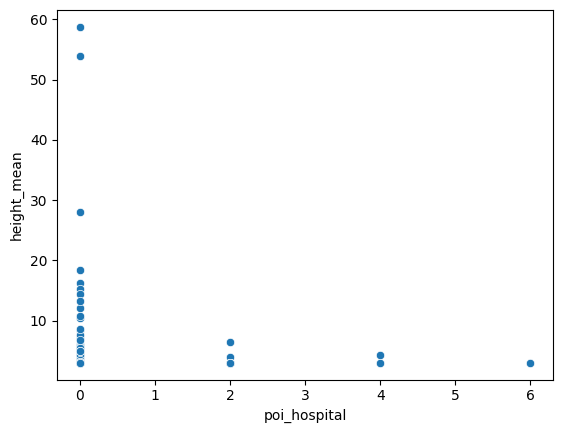

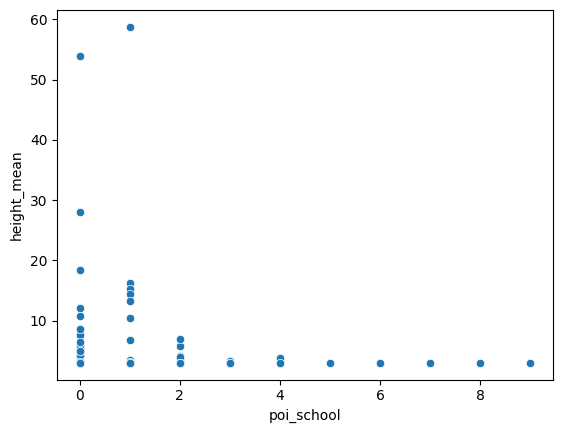

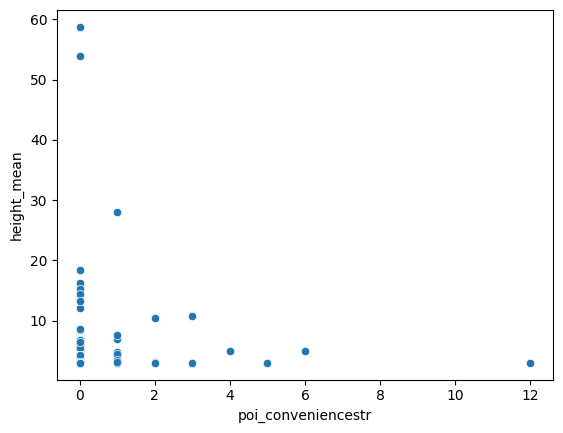

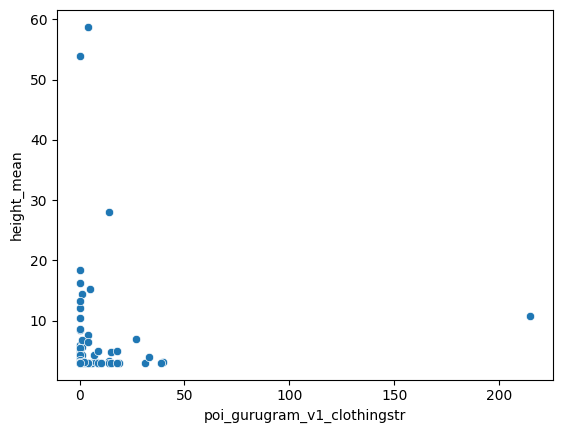

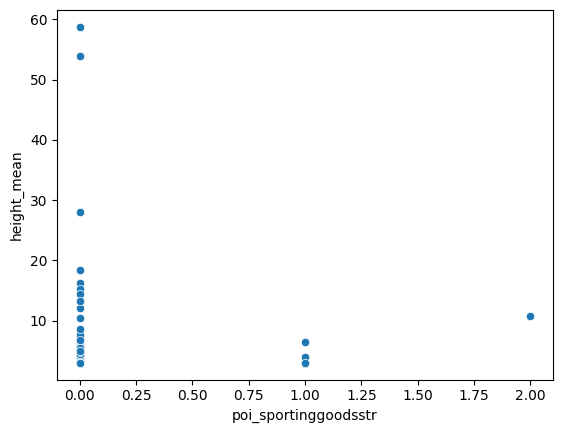

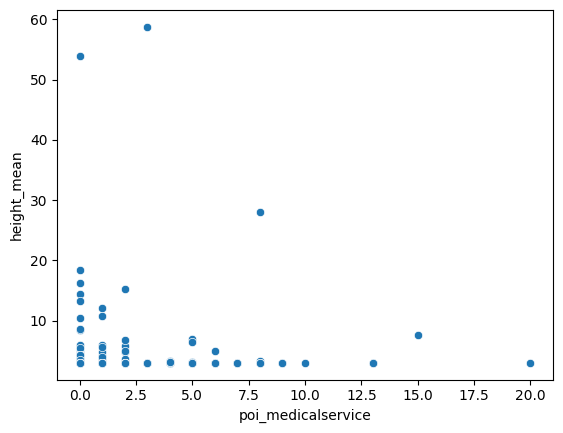

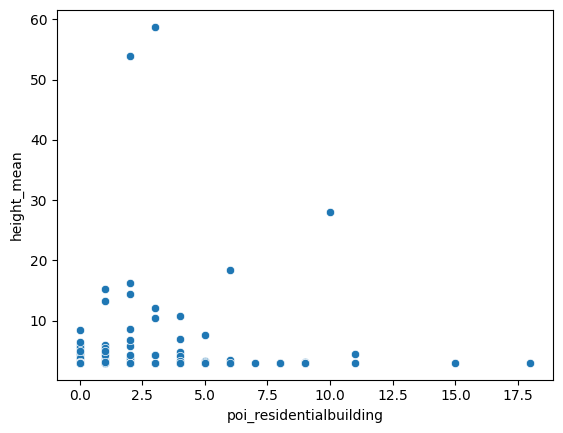

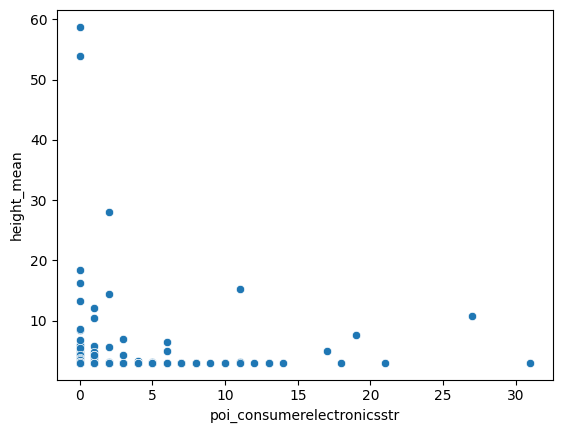

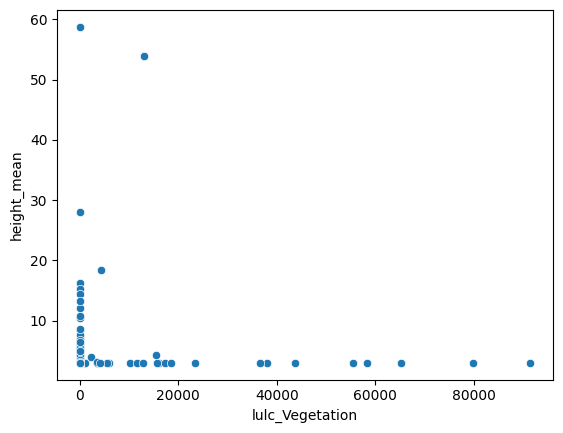

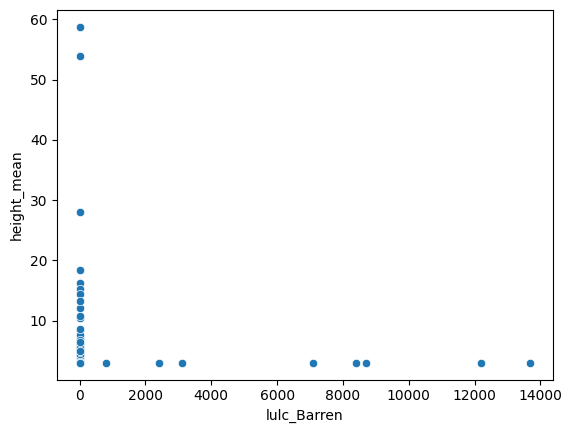

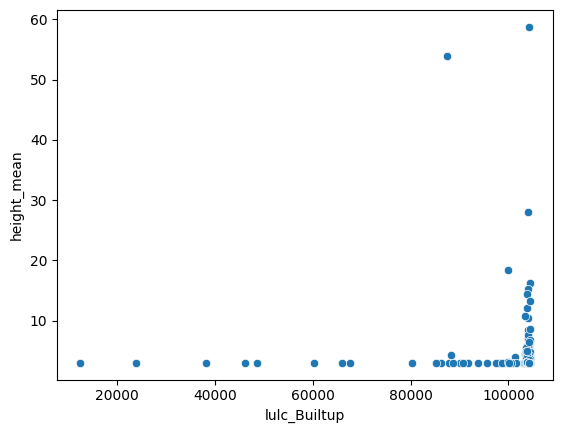

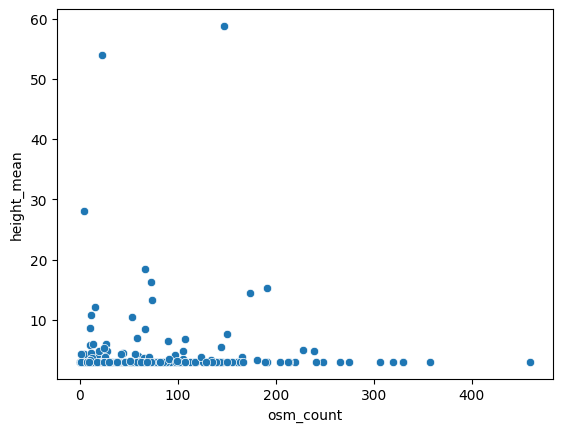

In [313]:
for i in df_test.columns[:-1]:
    plt.figure()
    sns.scatterplot(x=df_test[i],y=df_test["height_mean"])

In [314]:
df_test.isnull().sum()

ndvi_mean                      0
ndbi_mean                      0
albedo_mean                    0
gaia_mean                      0
ntl_mean                       0
s1vh_mean                      0
s1vv_mean                      0
pop_sum                        0
poi_businessfacility           0
poi_restaurant                 0
poi_nightlife                  0
poi_shopping                   0
poi_hotel                      0
poi_cinema                     0
poi_sportscomplex              0
poi_sportscentre               0
poi_hospital                   0
poi_school                     0
poi_conveniencestr             0
poi_gurugram_v1_clothingstr    0
poi_sportinggoodsstr           0
poi_medicalservice             0
poi_residentialbuilding        0
poi_consumerelectronicsstr     0
lulc_Vegetation                0
lulc_Barren                    0
lulc_Builtup                   0
osm_count                      0
height_mean                    0
dtype: int64

In [352]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=df_test.iloc[:,:-1]
VIF=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [353]:
X=pd.DataFrame({"columns_name":df_test.columns[:-1],"VIF":VIF})
X

columns_name         VIF
0                     ndvi_mean   45.003182
1                     ndbi_mean   20.018896
2                   albedo_mean 2703.803053
3                     gaia_mean   37.400896
4                      ntl_mean   21.814849
5                     s1vh_mean  312.936520
6                     s1vv_mean   62.029159
7                       pop_sum   21.030584
8          poi_businessfacility    2.569185
9                poi_restaurant    4.379400
10                poi_nightlife    1.651936
11                 poi_shopping    3.324291
12                    poi_hotel    1.370253
13                   poi_cinema    4.122813
14            poi_sportscomplex    1.286893
15             poi_sportscentre    2.760456
16                 poi_hospital    1.281563
17                   poi_school    2.187237
18           poi_conveniencestr    2.101933
19  poi_gurugram_v1_clothingstr    6.636794
20         poi_sportinggoodsstr    2.512987
21           poi_medicalservice    3.413788
22      poi_residentialbuilding    1.912861
23   poi_consumerelectronicsstr    4.608865
24              lulc_Vegetation   41.007323
25                  lulc_Barren    2.757629
26                 lulc_Builtup 2665.993198
27                    osm_count    4.182421

In [471]:
df_test_1=df_test.drop(columns=["albedo_mean","lulc_Builtup","s1vh_mean","gaia_mean","s1vv_mean","ndvi_mean","poi_nightlife","poi_hotel","poi_sportinggoodsstr","poi_consumerelectronicsstr","lulc_Builtup","lulc_Barren"])

In [493]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=df_test_1.iloc[:,:-1]
VIF=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [494]:
X=pd.DataFrame({"columns_name":df_test_1.columns[:-1],"VIF":VIF})
X

columns_name      VIF
0                     ndbi_mean 8.632751
1                      ntl_mean 9.578544
2                       pop_sum 8.994485
3          poi_businessfacility 1.793344
4                poi_restaurant 4.071711
5                  poi_shopping 3.105404
6                    poi_cinema 2.978541
7             poi_sportscomplex 1.184291
8              poi_sportscentre 2.421238
9                  poi_hospital 1.144272
10                   poi_school 1.970854
11           poi_conveniencestr 1.931314
12  poi_gurugram_v1_clothingstr 4.148552
13           poi_medicalservice 2.156488
14      poi_residentialbuilding 1.623697
15              lulc_Vegetation 1.428067
16                  lulc_Barren 1.182249
17                    osm_count 2.835019

<h1><center>Model Building<center></h1>

# RandomForest

In [495]:
x=df_test_1.iloc[:,:-1]
y=df_test_1.iloc[:,-1]

In [496]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(157, 18)
(157,)
(40, 18)
(40,)


In [497]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [498]:
from sklearn.ensemble import RandomForestRegressor
model_r=RandomForestRegressor(n_estimators=200,max_depth=3,random_state=42)

In [499]:
model_r.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=200, random_state=42)

In [500]:
y_predict_train=model_r.predict(x_train)
y_predict_test=model_r.predict(x_test)

#### RESULT OF Random Forest (Max depth=1,other default)

In [501]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  1.4612929736259166
mean Absolute error_of_test:  2.7433675529692936
mean squared error_of_train:  10.5877416245694
mean squared error_of_test:  32.890263550994824
root mean Absolute error_of_train:  3.2538810095898407
root mean Absolute error_of_test:  5.735003361027335
r2_on_train:  0.7420984808384476
r2_on_test:   -0.9808747691083968


### Features's  Importance

In [502]:
pd.DataFrame(df_test_1.columns)
values=model_r.feature_importances_
pd.DataFrame({"columns_name":df_test_1.columns[:-1],"feature_importances":values})

columns_name  feature_importances
0                     ndbi_mean             0.174527
1                      ntl_mean             0.150007
2                       pop_sum             0.009642
3          poi_businessfacility             0.076518
4                poi_restaurant             0.313380
5                  poi_shopping             0.002135
6                    poi_cinema             0.004624
7             poi_sportscomplex             0.149933
8              poi_sportscentre             0.005070
9                  poi_hospital             0.000000
10                   poi_school             0.014541
11           poi_conveniencestr             0.001179
12  poi_gurugram_v1_clothingstr             0.003973
13           poi_medicalservice             0.008872
14      poi_residentialbuilding             0.024936
15              lulc_Vegetation             0.023700
16                  lulc_Barren             0.000000
17                    osm_count             0.036964

### Original_height vs Predicted height 

In [503]:
com_org_vs_pre=pd.DataFrame({"Original_height":y_test,"Predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

Original_height  Predicted_height
0          3.053254          3.473570
1         28.100000          8.185623
2          3.000000          3.476198
3          3.000000          4.053053
4          3.000000         17.038693
5          3.000000          3.480976
6          3.696429          3.439630
7          3.000000          3.476198
8          8.600000          6.406142
9          3.000000          3.600448
10         3.000000          3.434362
11         3.000000          3.447552
12         3.000000          3.439630
13         8.462500          3.450387
14         3.000000          3.877242
15         3.000000          3.434362
16         3.000000          4.040864
17         3.000000          3.434362
18         3.104762          3.480566
19         5.553719          7.590176
20         6.731429          3.473570
21         3.000000          3.432698
22         3.000000          3.456336
23         3.000000          3.480976
24         3.000000          3.476198
25         3.000000          3.613930
26         3.457143         20.964527
27         3.000000          3.476198
28         3.000000          3.553834
29         3.000000          5.979045
30         3.000000         15.432519
31         3.000000         17.038693
32         3.000000          3.949529
33         3.000000          3.461603
34         3.000000          3.476198
35         3.164557          3.434362
36         3.000000          3.995135
37         3.000000          3.439630
38         3.000000          3.553834
39         3.000000          3.439630

### Comparision btw Original_height vs Predicted height 

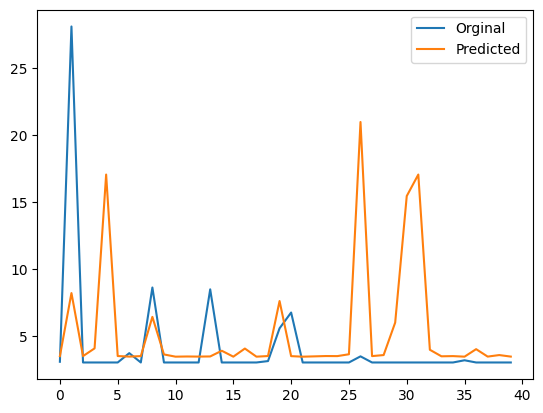

In [504]:
plt.figure
com_org_vs_pre["Original_height"].plot(label="Orginal")
com_org_vs_pre["Predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

### Find Best fit parameter for Random Forest  By RandomizedSearchCV

In [505]:

from sklearn.model_selection import RandomizedSearchCV
n_estimators= [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
# when there is no max_depth it takes none so that the model go to its maximum extent 
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
# Create the random grid
random_grid={'n_estimators': n_estimators , 'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
random_grid
rf=RandomForestRegressor(random_state=42)
# here cv is cross validation and n_jobs=-1 tell to run all trees simulteniously
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                             scoring='neg_mean_absolute_error',cv=3,verbose=2,
                             random_state=42,n_jobs=-1,return_train_score=True)

rf2=rf_random.fit(x_train,y_train);
# by runninng below code we get  the parameter for best model
#print("best parameter",rf2.best_params_)
#y_pred=rf2.predict(x_test)
#print("r2_on_train: ", (y_pred,y_test))
#rf2.cv_results_
#importance=rf2.feature_importances_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [485]:
print("best parameter",rf2.best_params_)

best parameter {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}


## Random Forest with after find best parameter

In [486]:
from sklearn.ensemble import RandomForestRegressor
model_r_b=RandomForestRegressor(n_estimators=1000,min_samples_split = 5,max_depth=30,min_samples_leaf=4,max_features='auto',random_state=42)

In [487]:
model_r_b.fit(x_train,y_train)

C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1000, random_state=42)

In [488]:
y_predict_train=model_r_b.predict(x_train)
y_predict_test=model_r_b.predict(x_test)
#y_predict_test

### Result of Random Forest(with best parameter)

In [489]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))
n = X.shape[0]
p = X.shape[1]
r2_train=r2_score(y_train,y_predict_train)
r2_test=r2_score(y_test,y_predict_test)                
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print("adjust_r2_train:",adjusted_r2_train)
print("adjusted_r2_test:",adjusted_r2_test)
                  

mean Absolute error_of_train:  1.6595141638045952
mean Absolute error_of_test:  1.3815140162374513
mean squared error_of_train:  25.802425089580403
mean squared error_of_test:  8.276355447135188
root mean Absolute error_of_train:  5.079608753593174
root mean Absolute error_of_test:  2.876865559447502
r2_on_train:  0.3714915923889883
r2_on_test:   0.5015417355964891
adjust_r2_train: 0.2876904713741868
adjusted_r2_test: 0.435080633676021


### so after introducing lulc builtup accuracy decreases

### Features's  Importance

In [490]:
pd.set_option("display.float_format",lambda x:"%.6f"%x)
pd.DataFrame(x.columns)
values=model_r_b.feature_importances_
pd.DataFrame({"columns_name":x.columns,"feature_importances":values})

columns_name  feature_importances
0                     ndbi_mean             0.060458
1                      ntl_mean             0.392980
2                       pop_sum             0.020292
3          poi_businessfacility             0.019062
4                poi_restaurant             0.400528
5                  poi_shopping             0.000101
6                    poi_cinema             0.000049
7             poi_sportscomplex             0.000000
8              poi_sportscentre             0.000415
9                  poi_hospital             0.000002
10                   poi_school             0.008632
11           poi_conveniencestr             0.001862
12  poi_gurugram_v1_clothingstr             0.001524
13           poi_medicalservice             0.001717
14      poi_residentialbuilding             0.020235
15              lulc_Vegetation             0.000497
16                  lulc_Barren             0.000000
17                    osm_count             0.071646

### Original_height vs Predicted height 

In [491]:
com_org_vs_pre=pd.DataFrame({"Original_height":y_test,"Predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

Original_height  Predicted_height
0          3.053254          3.287197
1         28.100000         13.683081
2          3.000000          3.295267
3          3.000000          5.327419
4          3.000000          3.300858
5          3.000000          3.606301
6          3.696429          3.193613
7          3.000000          3.678807
8          8.600000         10.834044
9          3.000000          4.040098
10         3.000000          3.378925
11         3.000000          3.255790
12         3.000000          3.280028
13         8.462500          7.767116
14         3.000000          3.777174
15         3.000000          3.293126
16         3.000000          4.757252
17         3.000000          3.363268
18         3.104762          3.359268
19         5.553719         13.592088
20         6.731429          3.298581
21         3.000000          3.356067
22         3.000000          3.254064
23         3.000000          3.773620
24         3.000000          3.391550
25         3.000000          4.628765
26         3.457143          5.563682
27         3.000000          3.349764
28         3.000000          3.293836
29         3.000000          6.817373
30         3.000000          4.226290
31         3.000000          3.187299
32         3.000000          4.179373
33         3.000000          3.405087
34         3.000000          3.464659
35         3.164557          3.155613
36         3.000000          4.663007
37         3.000000          3.493913
38         3.000000          3.234214
39         3.000000          3.263054

### Comparision btw Original_height vs Predicted height 

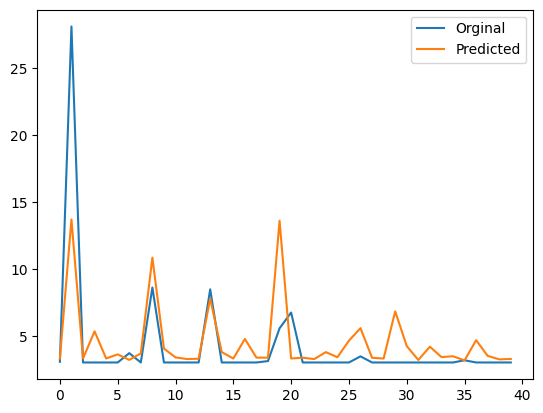

In [492]:
plt.figure
com_org_vs_pre["Original_height"].plot(label="Orginal")
com_org_vs_pre["Predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

In [292]:
from xgboost import XGBRegressor
model_x = XGBRegressor()
model_x.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
y_predict_train=model_x.predict(x_train)
y_predict_test=model_x.predict(x_test)

In [47]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  0.0006828993384489059
mean Absolute error_of_test:  2.6988627046848297
mean squared error_of_train:  9.903721353565089e-07
mean squared error_of_test:  69.48163232280616
root mean Absolute error_of_train:  0.000995174424589232
root mean Absolute error_of_test:  8.33556430740032
r2_on_train:  0.999999975876019
r2_on_test:   -3.18465519959478


In [320]:
com_org_vs_pre=pd.DataFrame({"Original_height":y_test,"Predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

Original_height  Predicted_height
0          3.053254          3.431928
1         28.100000          4.366535
2          3.000000          3.330546
3          3.000000          2.971437
4          3.000000          2.986905
5          3.000000          5.684210
6          3.696429          3.389678
7          3.000000          9.050350
8          8.600000          3.978972
9          3.000000          3.966528
10         3.000000          3.007632
11         3.000000          4.179761
12         3.000000          3.115298
13         8.462500          5.045897
14         3.000000          3.002895
15         3.000000          3.371981
16         3.000000          3.270506
17         3.000000          3.176987
18         3.104762          3.133928
19         5.553719          9.692616
20         6.731429          4.048672
21         3.000000          3.482355
22         3.000000          3.382504
23         3.000000          4.206248
24         3.000000          3.521687
25         3.000000          5.049700
26         3.457143          2.933987
27         3.000000          4.040965
28         3.000000          3.069053
29         3.000000          3.438535
30         3.000000          2.924407
31         3.000000          2.952651
32         3.000000          2.986504
33         3.000000          3.452556
34         3.000000          3.973538
35         3.164557          2.969381
36         3.000000          2.945579
37         3.000000          3.036528
38         3.000000          3.386774
39         3.000000          3.662384

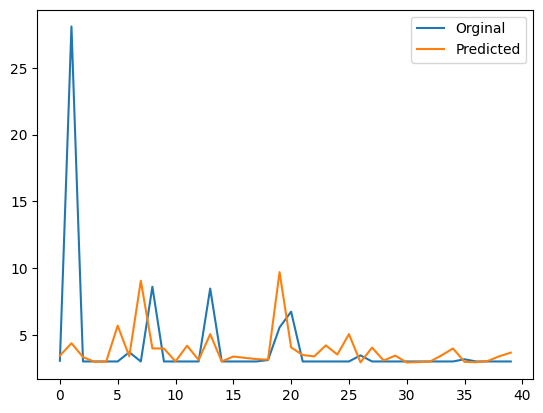

In [322]:
plt.figure
com_org_vs_pre["Original_height"].plot(label="Orginal")
com_org_vs_pre["Predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

In [323]:
from xgboost import XGBRegressor
model_xp = XGBRegressor(n_estimators=1500,max_depth=20, eta=0.3, subsample=0.7, colsample_bytree=0.5)
model_xp.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [324]:
y_predict_train=model_xp.predict(x_train)
y_predict_test=model_xp.predict(x_test)

In [325]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  0.00037208843634540254
mean Absolute error_of_test:  2.420625687714577
mean squared error_of_train:  2.271614210909023e-07
mean squared error_of_test:  32.20209241306403
root mean Absolute error_of_train:  0.0004766145414178026
root mean Absolute error_of_test:  5.674688750324905
r2_on_train:  0.9999999944666882
r2_on_test:   -0.9394284352460311


# Tensorflow

In [256]:
import keras 
from  keras.models import Sequential
from keras.layers import InputLayer, Dense
import tensorflow as tf

In [263]:
model=Sequential()

In [264]:
model= keras.Sequential([
    keras.layers.Dense(105,activation="tanh"),
    keras.layers.Dense(1,activation="sigmoid")
])



In [265]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics="accuracy")

In [266]:
#x_train.isnull().sum()
y_train.isnull().sum()

0

In [267]:
model.fit(x_train,y_train,epochs=1)

5/5 [==============================] - 1s 3ms/step - loss: 0.6199 - accuracy: 0.0000e+00


In [268]:
y_predict_train=model.predict(x_train)
y_predict_test=model.predict(x_test)

2/2 [==============================] - 0s 0s/step


In [269]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  4.043076818147128
mean Absolute error_of_test:  3.611724142656159
mean squared error_of_train:  57.28427537917744
mean squared error_of_test:  29.50078047855926
root mean Absolute error_of_train:  7.568637617112966
root mean Absolute error_of_test:  5.431462094000036
r2_on_train:  -0.39535910189529333
r2_on_test:   -0.7767371072712499


In [28]:
# finding best fit line which have lowest mse by changing m and b value in y=mx+b
def gradient_descent(x,y):
    m=0
    b=0
    iteration=1000
    learning_rate=0.005
    for i in range(iteration):
        y_pred=m*x +b 
        mse=sum((y-y_pred)**2)
        md= (-2/len(x))*sum(x*(y-y_pred))
        bd=(-2/len(x))*(y-y_pred)
        m=m-learning_rate*md
        b=b-learning_rate*bd
        print(mse)
        
    pass




    

In [29]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])
gradient_descent(x,y)

445
352.59947999999997
279.73082154672
222.26392242904714
176.94201522071359
141.19699540046523
113.00379944925002
90.7655755724859
73.22313576207866
59.383554763212445
48.46386721801673
39.84667038602031
33.04511493574739
27.675298643484208
23.434497610077603
20.084000617552498
17.435573264014867
15.340784338443026
13.682589197569346
12.368692888218474
11.326316677246739
10.498071230125099
9.838702430669981
9.31252531671551
8.89140062548268
8.553139210569281
8.280243854539188
8.058917132787272
7.878279070541214
7.729750230982787
7.606565253085865
7.503389254795673
7.416015350055926
7.341126127673826
7.276105566908726
7.218890724636431
7.167854784151083
7.121714833997935
7.07945914752384
7.0402898396015345
7.003577648932163
6.968826281899719
6.935644296129875
6.903722929437576
6.872818616975137
6.842739205232829
6.813333081170274
6.784480600056763
6.756087325944716
6.728078701484112
6.7003958448352225
6.6729922353478806
6.645831100072363
6.618883352906735
6.592125969522497
6.5655407059

In [30]:
m=1
b=0
y_pred=m*x +b 

In [31]:
y_pred

array([1, 2, 3, 4, 5])

In [32]:
(y-y_pred)

array([4, 5, 6, 7, 8])

In [33]:
sum((y-y_pred)**2)

190

In [35]:
(-2/len(x))*sum(x*(y-y_pred))

-40.0

In [39]:
n=int(input("Enter the number"))
li=[]
for i in range(2,n):
    print(n,i)
    a=n/i
    if a%2==1:
        li.append(i)
    
if len(li)==0:
    print("i am the not  prime")
else:
    print("i am the prime ")

        
  

Enter the number2
i am the not  prime


In [36]:
5/2

2.5

In [32]:
2.5/2

1.25

In [124]:
da=pd.read_csv("sample.csv")


In [126]:
da.describe().T

count           mean         std            min  \
Index          25000.000000   12500.500000 7217.022701       1.000000   
Height(Inches) 25000.000000      67.993114    1.901679      60.278360   
Unnamed: 2     25000.000000     172.702509    4.830264     153.107034   
Weight(Pounds) 25000.000000     127.079421   11.660898      78.014760   
Unnamed: 4         0.000000            NaN         NaN            NaN   
Unnamed: 5         0.000000            NaN         NaN            NaN   
Unnamed: 6         1.000000 4317562.713000         NaN 4317562.713000   
Unnamed: 7         1.000000     172.702508         NaN     172.702508   

                          25%            50%            75%            max  
Index             6250.750000   12500.500000   18750.250000   25000.000000  
Height(Inches)      66.704397      67.995700      69.272958      75.152800  
Unnamed: 2         169.429170     172.709078     175.953312     190.888112  
Weight(Pounds)     119.308675     127.157750     134.892850     170.924000  
Unnamed: 4                NaN            NaN            NaN            NaN  
Unnamed: 5                NaN            NaN            NaN            NaN  
Unnamed: 6     4317562.713000 4317562.713000 4317562.713000 4317562.713000  
Unnamed: 7         172.702508     172.702508     172.702508     172.702508